# Comprehensive Exploratory Data Analysis - Healthcare Claims and Insurance Dataset

This notebook contains a thorough exploratory data analysis of the merged healthcare claims and insurance policies dataset. The analysis focuses on understanding data quality, patterns, relationships, and key insights for healthcare cost analysis and insurance coverage optimization.

## 1. Import Required Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from scipy.stats import normaltest, skew, kurtosis
import scipy

# Configuration
warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

print("Libraries imported successfully")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")
print(f"SciPy version: {scipy.__version__}")

Libraries imported successfully
Pandas version: 2.3.2
NumPy version: 2.3.3
Matplotlib version: 3.10.6
Seaborn version: 0.13.2
SciPy version: 1.16.2


## 2. Load and Inspect the Merged Dataset

In [8]:
# Load the merged dataset
df = pd.read_csv('../outputs/merged.csv')

print("Dataset loaded successfully")
print(f"Dataset shape: {df.shape}")
print(f"Number of records: {df.shape[0]:,}")
print(f"Number of features: {df.shape[1]:,}")
print("\nColumn names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

print("\nFirst 5 rows:")
df.head()

Dataset loaded successfully
Dataset shape: (55500, 27)
Number of records: 55,500
Number of features: 27

Column names:
 1. claim_id
 2. age
 3. gender
 4. medical_condition
 5. admission_type
 6. insurance_provider
 7. billing_amount
 8. length_of_stay_days
 9. provider_id
10. provider_name
11. plan_type
12. coverage_percentage
13. max_coverage_amount
14. copay_percentage
15. deductible_amount
16. annual_out_of_pocket_max
17. excluded_conditions
18. medication_coverage
19. diagnostic_test_coverage
20. admission_type_rules
21. waiting_period
22. pre_existing_condition_coverage
23. network_coverage
24. emergency_coverage
25. preventive_care_coverage
26. created_date
27. data_source

First 5 rows:


,claim_id,age,gender,medical_condition,admission_type,insurance_provider,billing_amount,length_of_stay_days,provider_id,provider_name,plan_type,coverage_percentage,max_coverage_amount,copay_percentage,deductible_amount,annual_out_of_pocket_max,excluded_conditions,medication_coverage,diagnostic_test_coverage,admission_type_rules,waiting_period,pre_existing_condition_coverage,network_coverage,emergency_coverage,preventive_care_coverage,created_date,data_source
0,1,30,Male,Cancer,Urgent,Blue Cross,18856.28,2,1,Blue Cross,PPO Standard,80.00,Unlimited,20.00,1500.00,8000.0,"Cosmetic surgery, Self-inflicted injuries, Exp...","Generic: $7.50 copay, Preferred brand: 30% coi...",80.00,"Precertification required for inpatient stays,...",0,0,Nationwide PPO network with extensive provider...,"Covered in and out of network, standard copays...",100.00,2025-09-29T16:16:14.205237,2025 Official Plan Documents
1,2,62,Male,Obesity,Emergency,Medicare,33643.33,6,2,Medicare,Original Medicare (Parts A & B),80.00,Unlimited,20.00,1676.00,No limit,"Cosmetic surgery, Routine dental/vision/hearin...","Part D separate - varies by plan, $2000 OOP ma...",80.00,"Part A: $1676 deductible per benefit period, t...",0,0,Any Medicare-accepting provider nationwide,Covered nationwide and limited international,100.00,2025-09-29T16:16:14.205242,2025 Official Plan Documents
2,3,76,Female,Obesity,Emergency,Aetna,27955.10,15,3,Aetna,Choice POS II Standard,80.00,Unlimited,20.00,750.00,6500.0,"Cosmetic treatments, Self-inflicted injuries, ...","Formulary-based tiered copays, Generic preferr...",100.00,"Precertification required, Hospital copay per ...",0,0,"POS with large provider network, optional PCP",Covered in and out of network with standard co...,100.00,2025-09-29T16:16:14.205243,2025 Official Plan Documents
3,4,28,Female,Diabetes,Elective,Medicare,37909.78,30,2,Medicare,Original Medicare (Parts A & B),80.00,Unlimited,20.00,1676.00,No limit,"Cosmetic surgery, Routine dental/vision/hearin...","Part D separate - varies by plan, $2000 OOP ma...",80.00,"Part A: $1676 deductible per benefit period, t...",0,0,Any Medicare-accepting provider nationwide,Covered nationwide and limited international,100.00,2025-09-29T16:16:14.205242,2025 Official Plan Documents
4,5,43,Female,Cancer,Urgent,Aetna,14238.32,20,3,Aetna,Choice POS II Standard,80.00,Unlimited,20.00,750.00,6500.0,"Cosmetic treatments, Self-inflicted injuries, ...","Formulary-based tiered copays, Generic preferr...",100.00,"Precertification required, Hospital copay per ...",0,0,"POS with large provider network, optional PCP",Covered in and out of network with standard co...,100.00,2025-09-29T16:16:14.205243,2025 Official Plan Documents


## 3. Data Overview and Basic Information

In [9]:
# Dataset information
print("Dataset Information:")
print("=" * 50)
df.info()

print("\n" + "=" * 50)
print("Memory Usage Summary:")
memory_usage = df.memory_usage(deep=True)
total_memory = memory_usage.sum()
print(f"Total memory usage: {total_memory / 1024**2:.2f} MB")

print("\n" + "=" * 50)
print("Data Types Summary:")
dtype_counts = df.dtypes.value_counts()
print(dtype_counts)

print("\n" + "=" * 50)
print("Sample records (last 3 rows):")
df.tail(3)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   claim_id                         55500 non-null  int64  
 1   age                              55500 non-null  int64  
 2   gender                           55500 non-null  object 
 3   medical_condition                55500 non-null  object 
 4   admission_type                   55500 non-null  object 
 5   insurance_provider               55500 non-null  object 
 6   billing_amount                   55500 non-null  float64
 7   length_of_stay_days              55500 non-null  int64  
 8   provider_id                      55500 non-null  int64  
 9   provider_name                    55500 non-null  object 
 10  plan_type                        55500 non-null  object 
 11  coverage_percentage              55500 non-null  float64
 1

,claim_id,age,gender,medical_condition,admission_type,insurance_provider,billing_amount,length_of_stay_days,provider_id,provider_name,plan_type,coverage_percentage,max_coverage_amount,copay_percentage,deductible_amount,annual_out_of_pocket_max,excluded_conditions,medication_coverage,diagnostic_test_coverage,admission_type_rules,waiting_period,pre_existing_condition_coverage,network_coverage,emergency_coverage,preventive_care_coverage,created_date,data_source
55497,55498,38,Female,Hypertension,Urgent,UnitedHealthcare,27620.76,28,4,UnitedHealthcare,Choice Plus PPO Standard,80.00,Unlimited,20.00,750.00,6000.0,"Cosmetic surgery, Experimental treatments, Sel...",Tiered formulary with copays and coinsurance s...,80.00,Prior authorization required for non-emergency...,0,0,Choice Plus network with nationwide coverage,Emergency services covered with standard cost-...,100.00,2025-09-29T16:16:14.205244,2025 Official Plan Documents
55498,55499,43,Male,Arthritis,Elective,Medicare,32451.09,6,2,Medicare,Original Medicare (Parts A & B),80.00,Unlimited,20.00,1676.00,No limit,"Cosmetic surgery, Routine dental/vision/hearin...","Part D separate - varies by plan, $2000 OOP ma...",80.00,"Part A: $1676 deductible per benefit period, t...",0,0,Any Medicare-accepting provider nationwide,Covered nationwide and limited international,100.00,2025-09-29T16:16:14.205242,2025 Official Plan Documents
55499,55500,53,Female,Arthritis,Urgent,Aetna,4010.13,27,3,Aetna,Choice POS II Standard,80.00,Unlimited,20.00,750.00,6500.0,"Cosmetic treatments, Self-inflicted injuries, ...","Formulary-based tiered copays, Generic preferr...",100.00,"Precertification required, Hospital copay per ...",0,0,"POS with large provider network, optional PCP",Covered in and out of network with standard co...,100.00,2025-09-29T16:16:14.205243,2025 Official Plan Documents


## 4. Missing Data Analysis

Missing Data Summary:
                                                          Column  \
claim_id                                                claim_id   
deductible_amount                              deductible_amount   
created_date                                        created_date   
preventive_care_coverage                preventive_care_coverage   
emergency_coverage                            emergency_coverage   
network_coverage                                network_coverage   
pre_existing_condition_coverage  pre_existing_condition_coverage   
waiting_period                                    waiting_period   
admission_type_rules                        admission_type_rules   
diagnostic_test_coverage                diagnostic_test_coverage   
medication_coverage                          medication_coverage   
excluded_conditions                          excluded_conditions   
annual_out_of_pocket_max                annual_out_of_pocket_max   
copay_percentage          

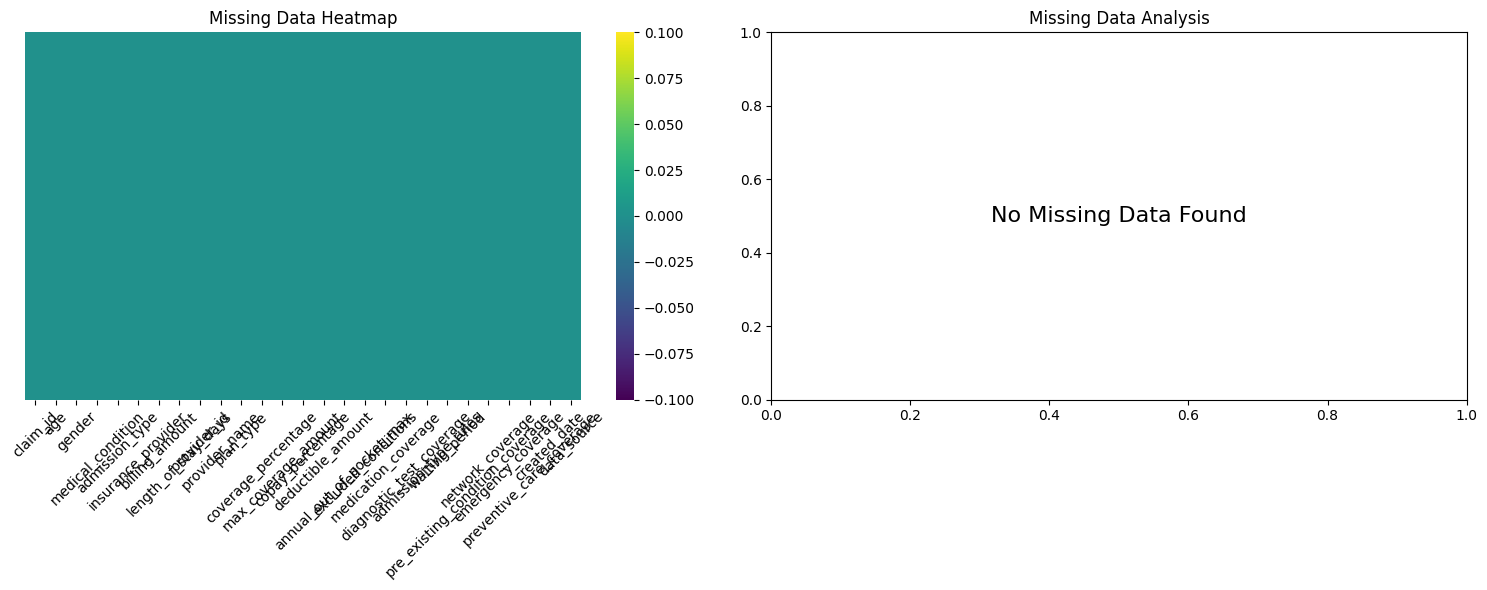


Total missing values in dataset: 0
Percentage of complete records: 100.00%


In [10]:
# Missing data analysis
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
})

missing_data = missing_data.sort_values('Missing_Percentage', ascending=False)
print("Missing Data Summary:")
print("=" * 60)
print(missing_data)

# Visualize missing data
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Missing data heatmap
sns.heatmap(df.isnull(), ax=axes[0], cbar=True, yticklabels=False, 
            cmap='viridis', xticklabels=True)
axes[0].set_title('Missing Data Heatmap')
axes[0].tick_params(axis='x', rotation=45)

# Missing data bar plot
missing_data_filtered = missing_data[missing_data['Missing_Count'] > 0]
if not missing_data_filtered.empty:
    axes[1].bar(missing_data_filtered['Column'], missing_data_filtered['Missing_Percentage'])
    axes[1].set_title('Missing Data Percentage by Column')
    axes[1].set_ylabel('Missing Percentage (%)')
    axes[1].tick_params(axis='x', rotation=45)
else:
    axes[1].text(0.5, 0.5, 'No Missing Data Found', 
                ha='center', va='center', transform=axes[1].transAxes, fontsize=16)
    axes[1].set_title('Missing Data Analysis')

plt.tight_layout()
plt.show()

print(f"\nTotal missing values in dataset: {df.isnull().sum().sum()}")
print(f"Percentage of complete records: {(1 - df.isnull().any(axis=1).sum() / len(df)) * 100:.2f}%")

## 5. Data Types and Memory Usage

Data Types and Memory Usage:
                                                          Column Data_Type  \
claim_id                                                claim_id     int64   
age                                                          age     int64   
gender                                                    gender    object   
medical_condition                              medical_condition    object   
admission_type                                    admission_type    object   
insurance_provider                            insurance_provider    object   
billing_amount                                    billing_amount   float64   
length_of_stay_days                          length_of_stay_days     int64   
provider_id                                          provider_id     int64   
provider_name                                      provider_name    object   
plan_type                                              plan_type    object   
coverage_percentage                

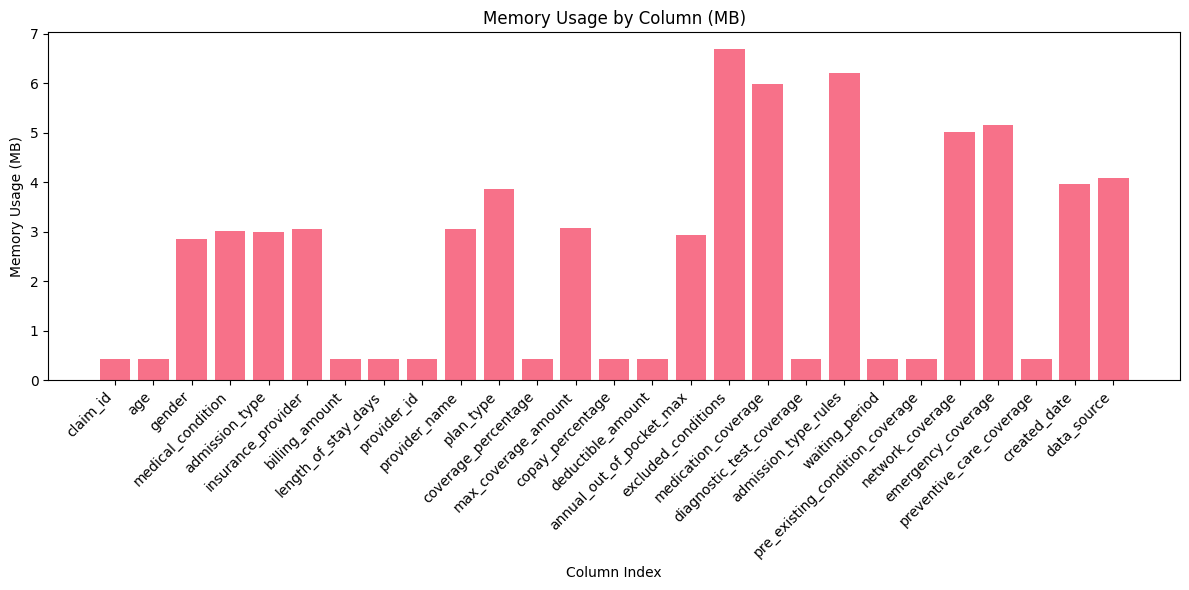

In [11]:
# Data types and memory analysis
dtype_info = pd.DataFrame({
    'Column': df.columns,
    'Data_Type': df.dtypes,
    'Non_Null_Count': df.count(),
    'Unique_Values': df.nunique(),
    'Memory_Usage_MB': df.memory_usage(deep=True)[1:] / 1024**2
})

print("Data Types and Memory Usage:")
print("=" * 80)
print(dtype_info)

# Identify categorical and numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical columns ({len(numerical_cols)}):")
for i, col in enumerate(numerical_cols, 1):
    print(f"{i:2d}. {col}")

print(f"\nCategorical columns ({len(categorical_cols)}):")
for i, col in enumerate(categorical_cols, 1):
    print(f"{i:2d}. {col}")

# Check for potential categorical columns stored as numeric
print("\nPotential categorical columns (numeric with low cardinality):")
for col in numerical_cols:
    unique_count = df[col].nunique()
    if unique_count <= 20:
        print(f"  {col}: {unique_count} unique values")

# Memory usage visualization
plt.figure(figsize=(12, 6))
memory_by_column = df.memory_usage(deep=True)[1:] / 1024**2
plt.bar(range(len(memory_by_column)), memory_by_column.values)
plt.title('Memory Usage by Column (MB)')
plt.xlabel('Column Index')
plt.ylabel('Memory Usage (MB)')
plt.xticks(range(len(memory_by_column)), df.columns, rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 6. Descriptive Statistics

In [12]:
# Descriptive statistics for numerical variables
print("Descriptive Statistics for Numerical Variables:")
print("=" * 80)
desc_stats = df.describe()
print(desc_stats)

# Additional statistics
print("\nAdditional Statistical Measures:")
print("=" * 80)

additional_stats = pd.DataFrame({
    'Variable': numerical_cols,
    'Skewness': [skew(df[col].dropna()) for col in numerical_cols],
    'Kurtosis': [kurtosis(df[col].dropna()) for col in numerical_cols],
    'Range': [df[col].max() - df[col].min() for col in numerical_cols],
    'IQR': [df[col].quantile(0.75) - df[col].quantile(0.25) for col in numerical_cols],
    'CV': [df[col].std() / df[col].mean() * 100 for col in numerical_cols]
})

print(additional_stats)

# Categorical variables summary
print("\nCategorical Variables Summary:")
print("=" * 80)
for col in categorical_cols:
    print(f"\n{col}:")
    value_counts = df[col].value_counts()
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Most frequent: {value_counts.index[0]} ({value_counts.iloc[0]:,} occurrences)")
    print(f"  Distribution:")
    for idx, (value, count) in enumerate(value_counts.head().items()):
        percentage = (count / len(df)) * 100
        print(f"    {value}: {count:,} ({percentage:.1f}%)")
    if len(value_counts) > 5:
        print(f"    ... and {len(value_counts) - 5} more values")

Descriptive Statistics for Numerical Variables:
       claim_id      age  billing_amount  length_of_stay_days  provider_id  \
count  55500.00 55500.00        55500.00             55500.00     55500.00   
mean   27750.50    51.54        25541.26                15.51         3.01   
std    16021.61    19.60        14207.96                 8.66         1.42   
min        1.00    13.00            9.24                 1.00         1.00   
25%    13875.75    35.00        13241.22                 8.00         2.00   
50%    27750.50    52.00        25538.07                15.00         3.00   
75%    41625.25    68.00        37820.51                23.00         4.00   
max    55500.00    89.00        52764.28                30.00         5.00   

       coverage_percentage  copay_percentage  deductible_amount  \
count             55500.00          55500.00           55500.00   
mean                 80.00             20.00            1440.25   
std                   0.00              0.00    

## 7. Univariate Analysis - Numerical Variables

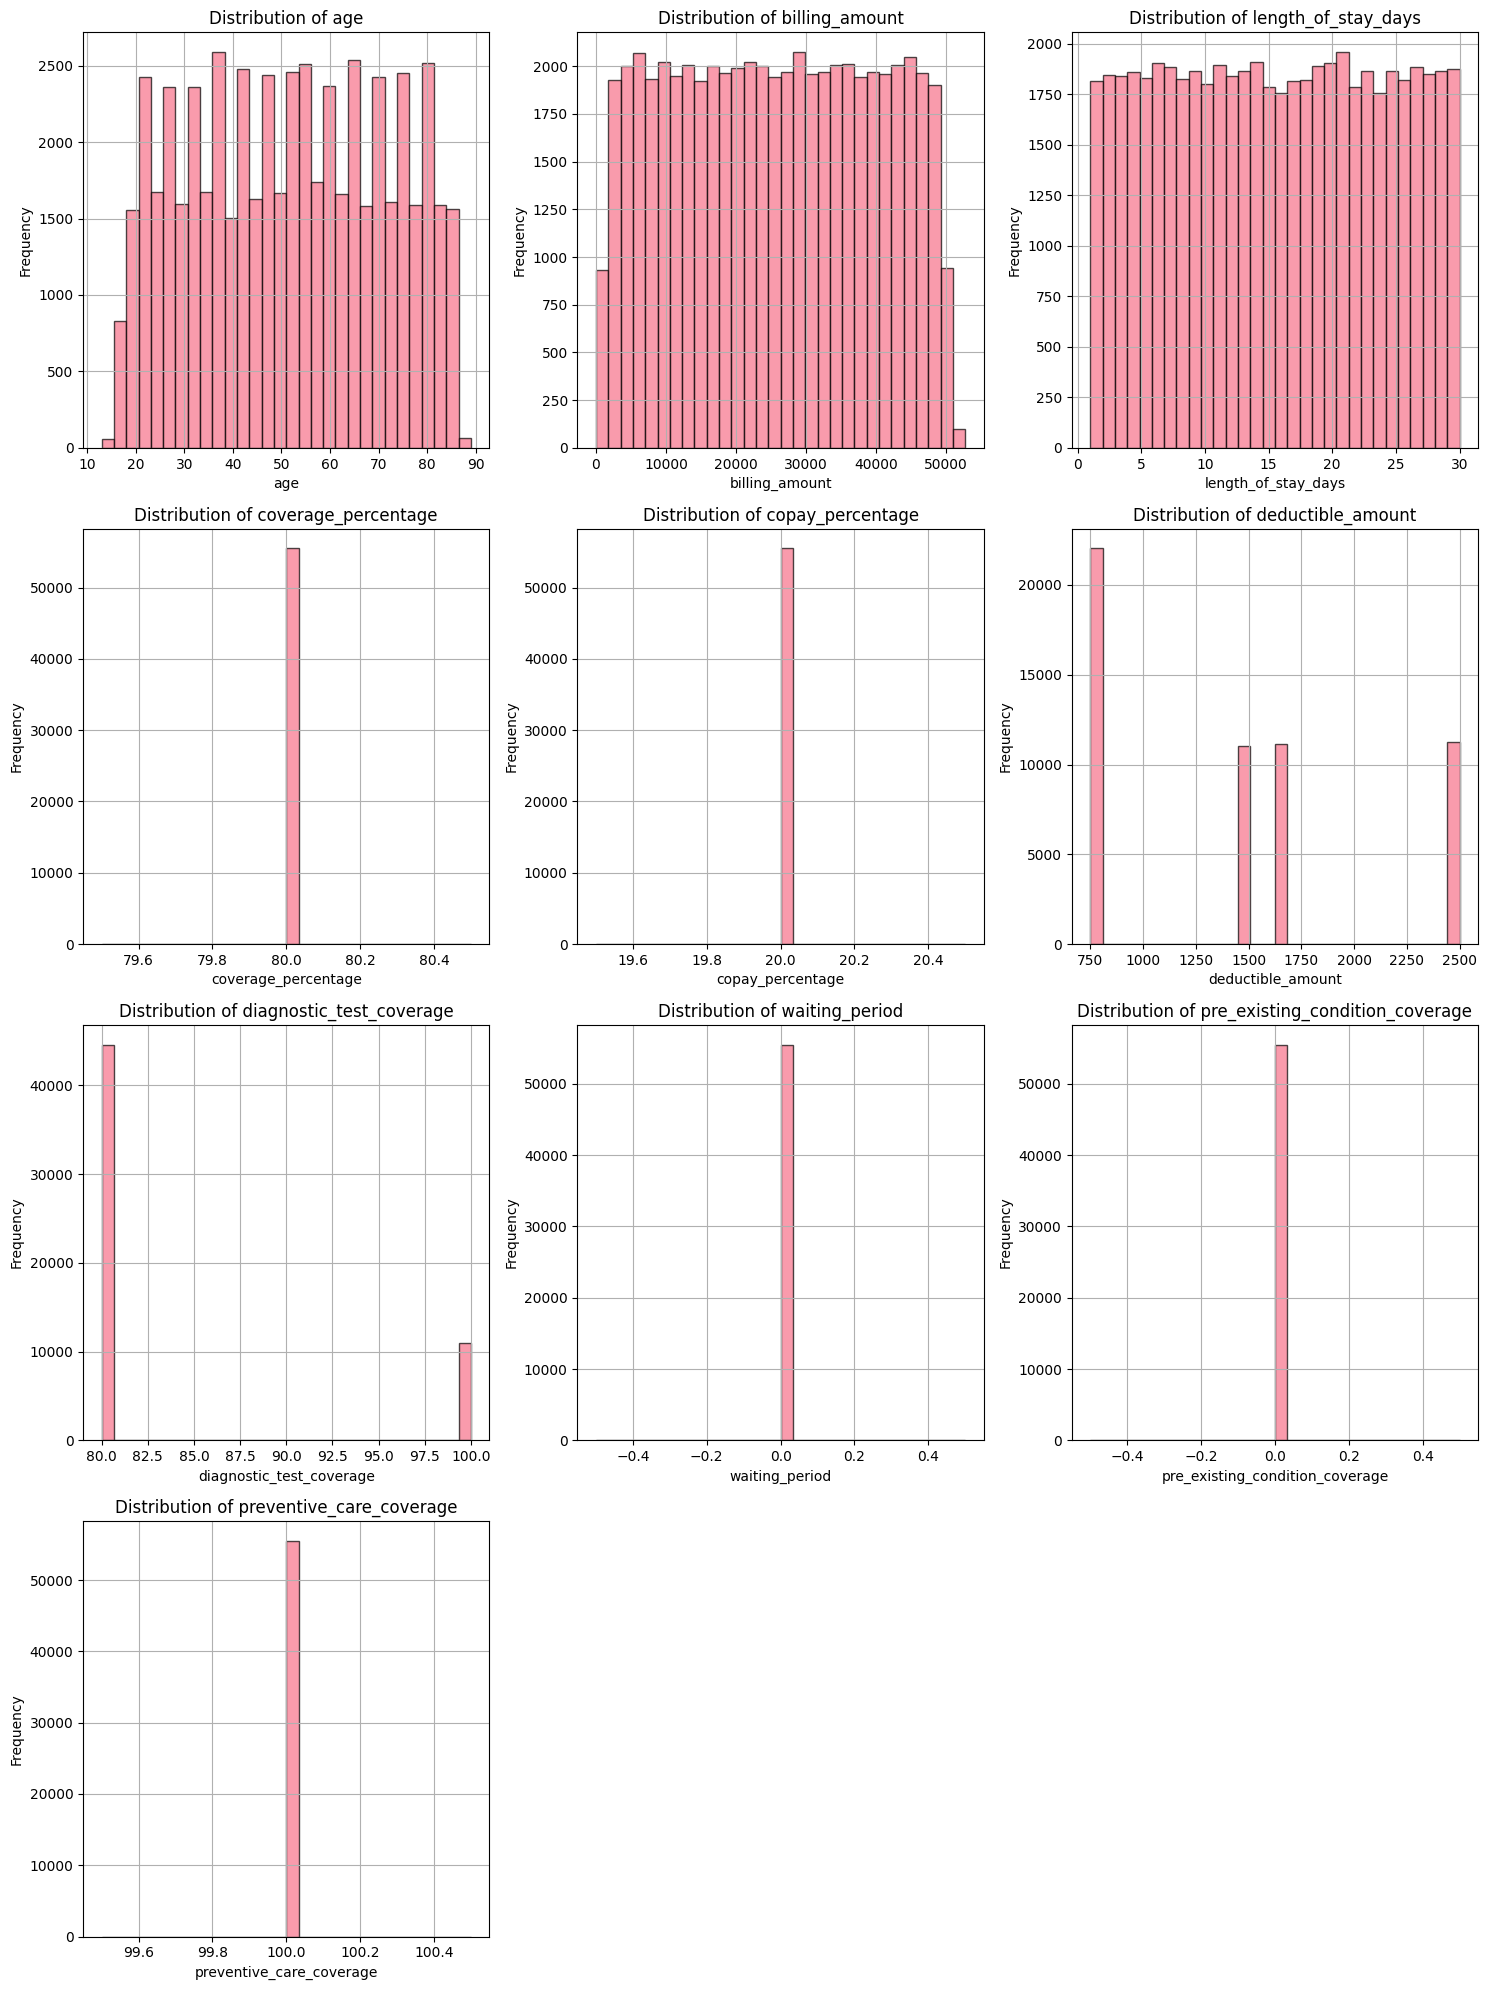

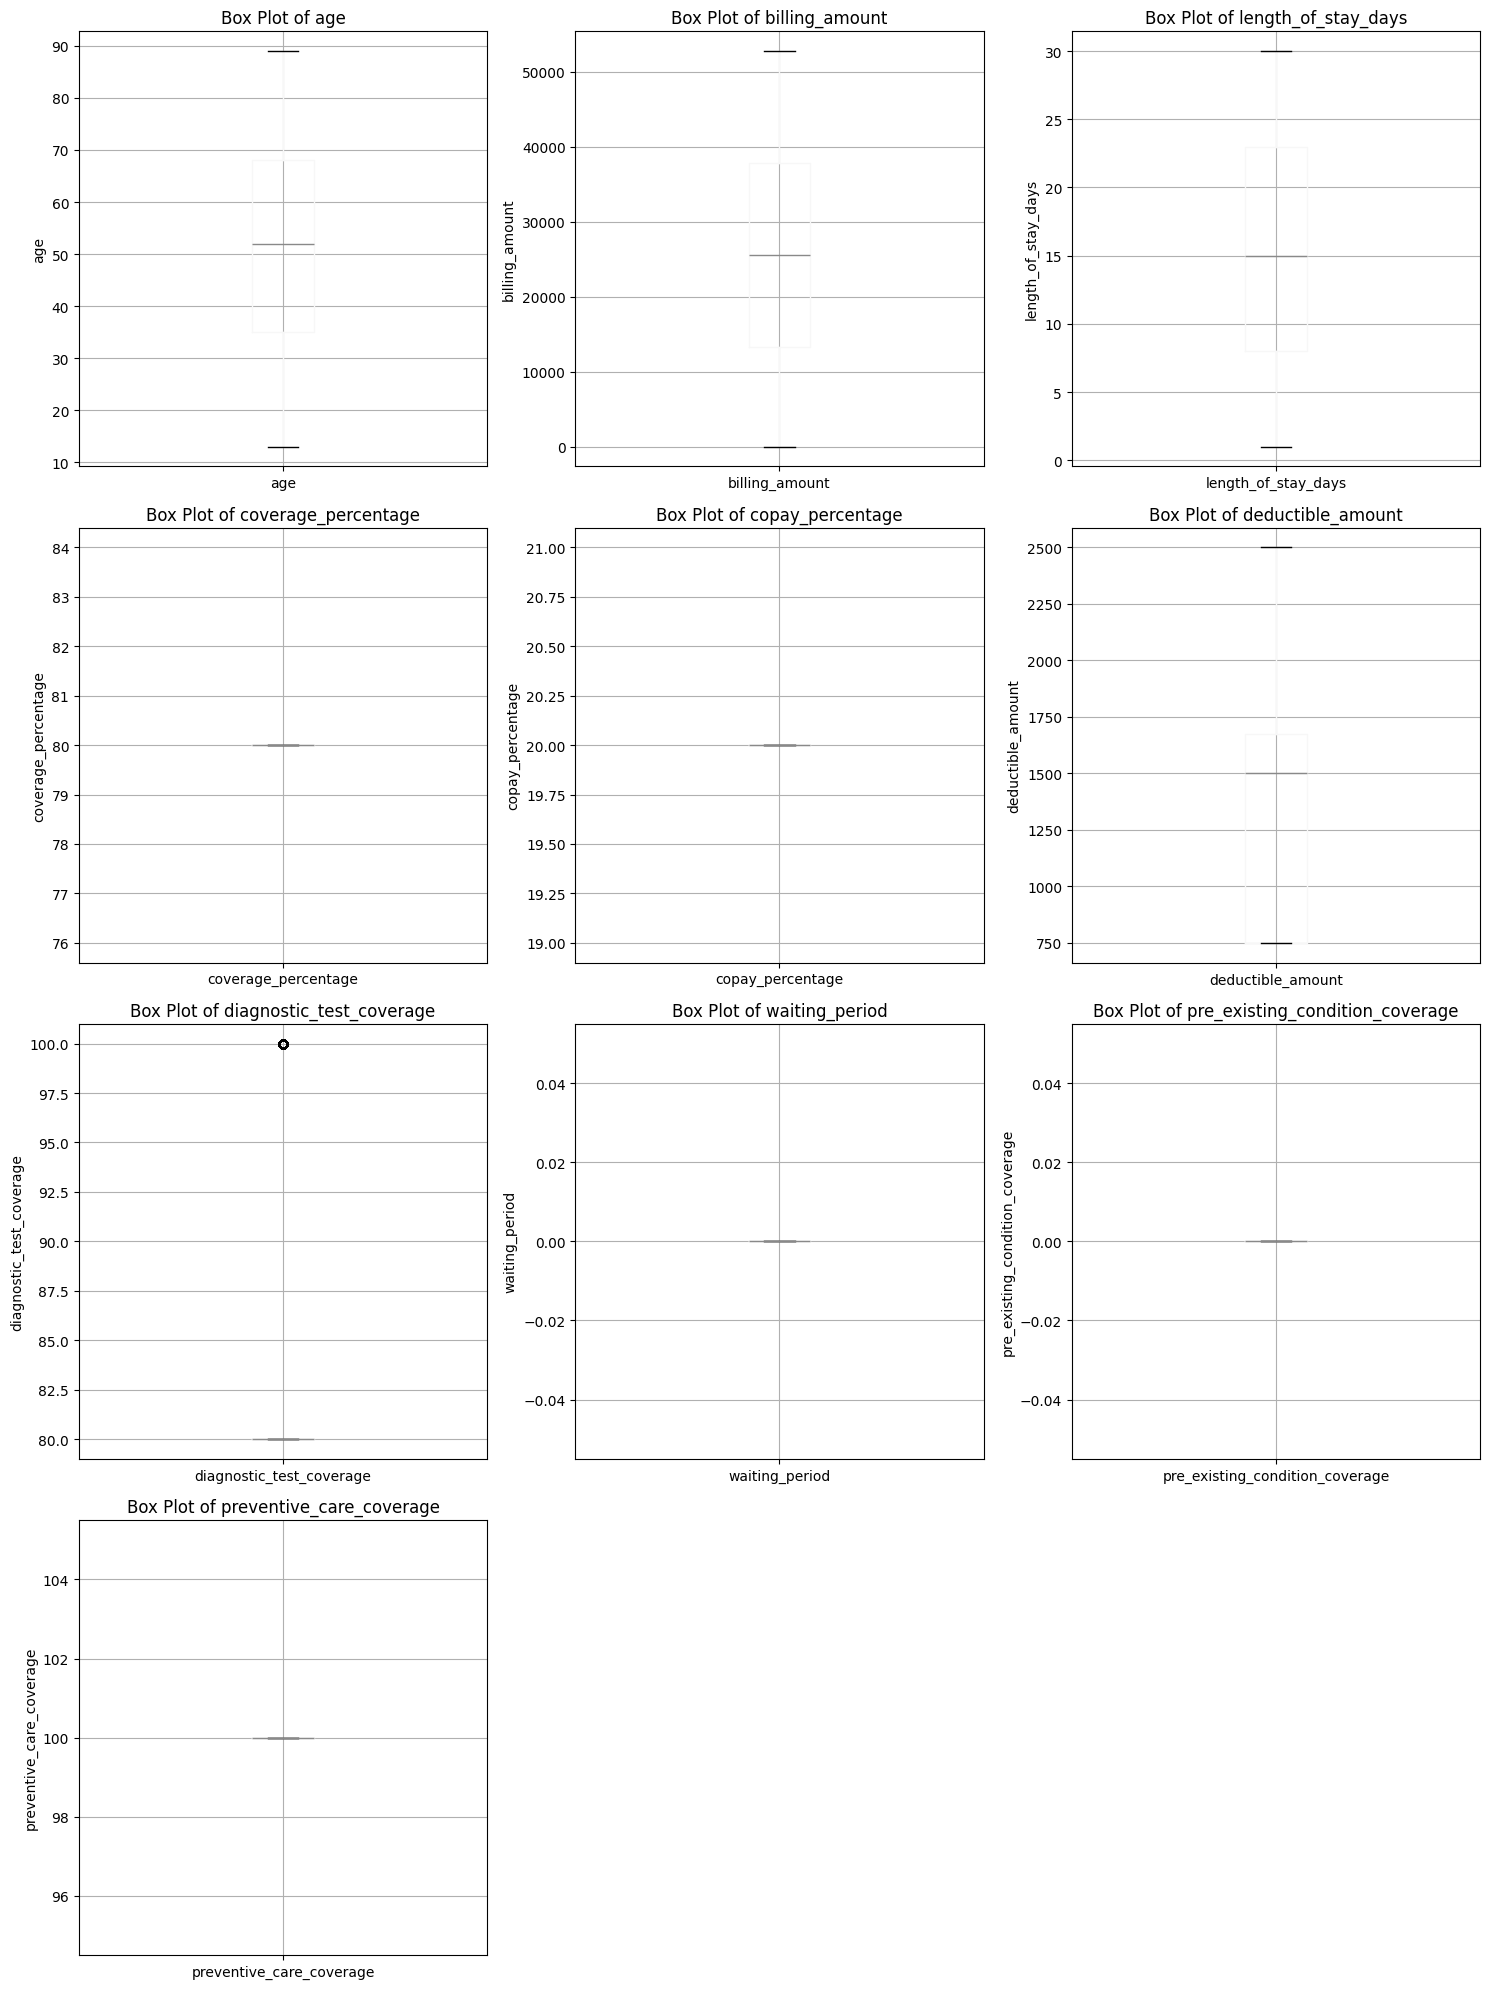

Key Variables Statistical Summary:

AGE:
  Mean: 51.54
  Median: 52.00
  Mode: 38.00
  Standard Deviation: 19.60
  Min: 13.00
  Max: 89.00
  25th Percentile: 35.00
  75th Percentile: 68.00

BILLING_AMOUNT:
  Mean: 25541.26
  Median: 25538.07
  Mode: 26.11
  Standard Deviation: 14207.96
  Min: 9.24
  Max: 52764.28
  25th Percentile: 13241.22
  75th Percentile: 37820.51

LENGTH_OF_STAY_DAYS:
  Mean: 15.51
  Median: 15.00
  Mode: 21.00
  Standard Deviation: 8.66
  Min: 1.00
  Max: 30.00
  25th Percentile: 8.00
  75th Percentile: 23.00

COVERAGE_PERCENTAGE:
  Mean: 80.00
  Median: 80.00
  Mode: 80.00
  Standard Deviation: 0.00
  Min: 80.00
  Max: 80.00
  25th Percentile: 80.00
  75th Percentile: 80.00

DEDUCTIBLE_AMOUNT:
  Mean: 1440.25
  Median: 1500.00
  Mode: 750.00
  Standard Deviation: 654.76
  Min: 750.00
  Max: 2500.00
  25th Percentile: 750.00
  75th Percentile: 1676.00


In [13]:
# Univariate analysis for numerical variables
numerical_cols_filtered = [col for col in numerical_cols if col not in ['claim_id', 'provider_id']]

# Create histograms for numerical variables
n_cols = 3
n_rows = (len(numerical_cols_filtered) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes

for i, col in enumerate(numerical_cols_filtered):
    if i < len(axes):
        df[col].hist(bins=30, ax=axes[i], alpha=0.7, edgecolor='black')
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

# Hide extra subplots
for i in range(len(numerical_cols_filtered), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Box plots for numerical variables
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes

for i, col in enumerate(numerical_cols_filtered):
    if i < len(axes):
        df.boxplot(column=col, ax=axes[i])
        axes[i].set_title(f'Box Plot of {col}')
        axes[i].set_ylabel(col)

# Hide extra subplots
for i in range(len(numerical_cols_filtered), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Summary statistics for key variables
key_vars = ['age', 'billing_amount', 'length_of_stay_days', 'coverage_percentage', 'deductible_amount']
key_vars = [col for col in key_vars if col in df.columns]

print("Key Variables Statistical Summary:")
print("=" * 60)
for col in key_vars:
    print(f"\n{col.upper()}:")
    print(f"  Mean: {df[col].mean():.2f}")
    print(f"  Median: {df[col].median():.2f}")
    print(f"  Mode: {df[col].mode().iloc[0]:.2f}")
    print(f"  Standard Deviation: {df[col].std():.2f}")
    print(f"  Min: {df[col].min():.2f}")
    print(f"  Max: {df[col].max():.2f}")
    print(f"  25th Percentile: {df[col].quantile(0.25):.2f}")
    print(f"  75th Percentile: {df[col].quantile(0.75):.2f}")

## 8. Univariate Analysis - Categorical Variables

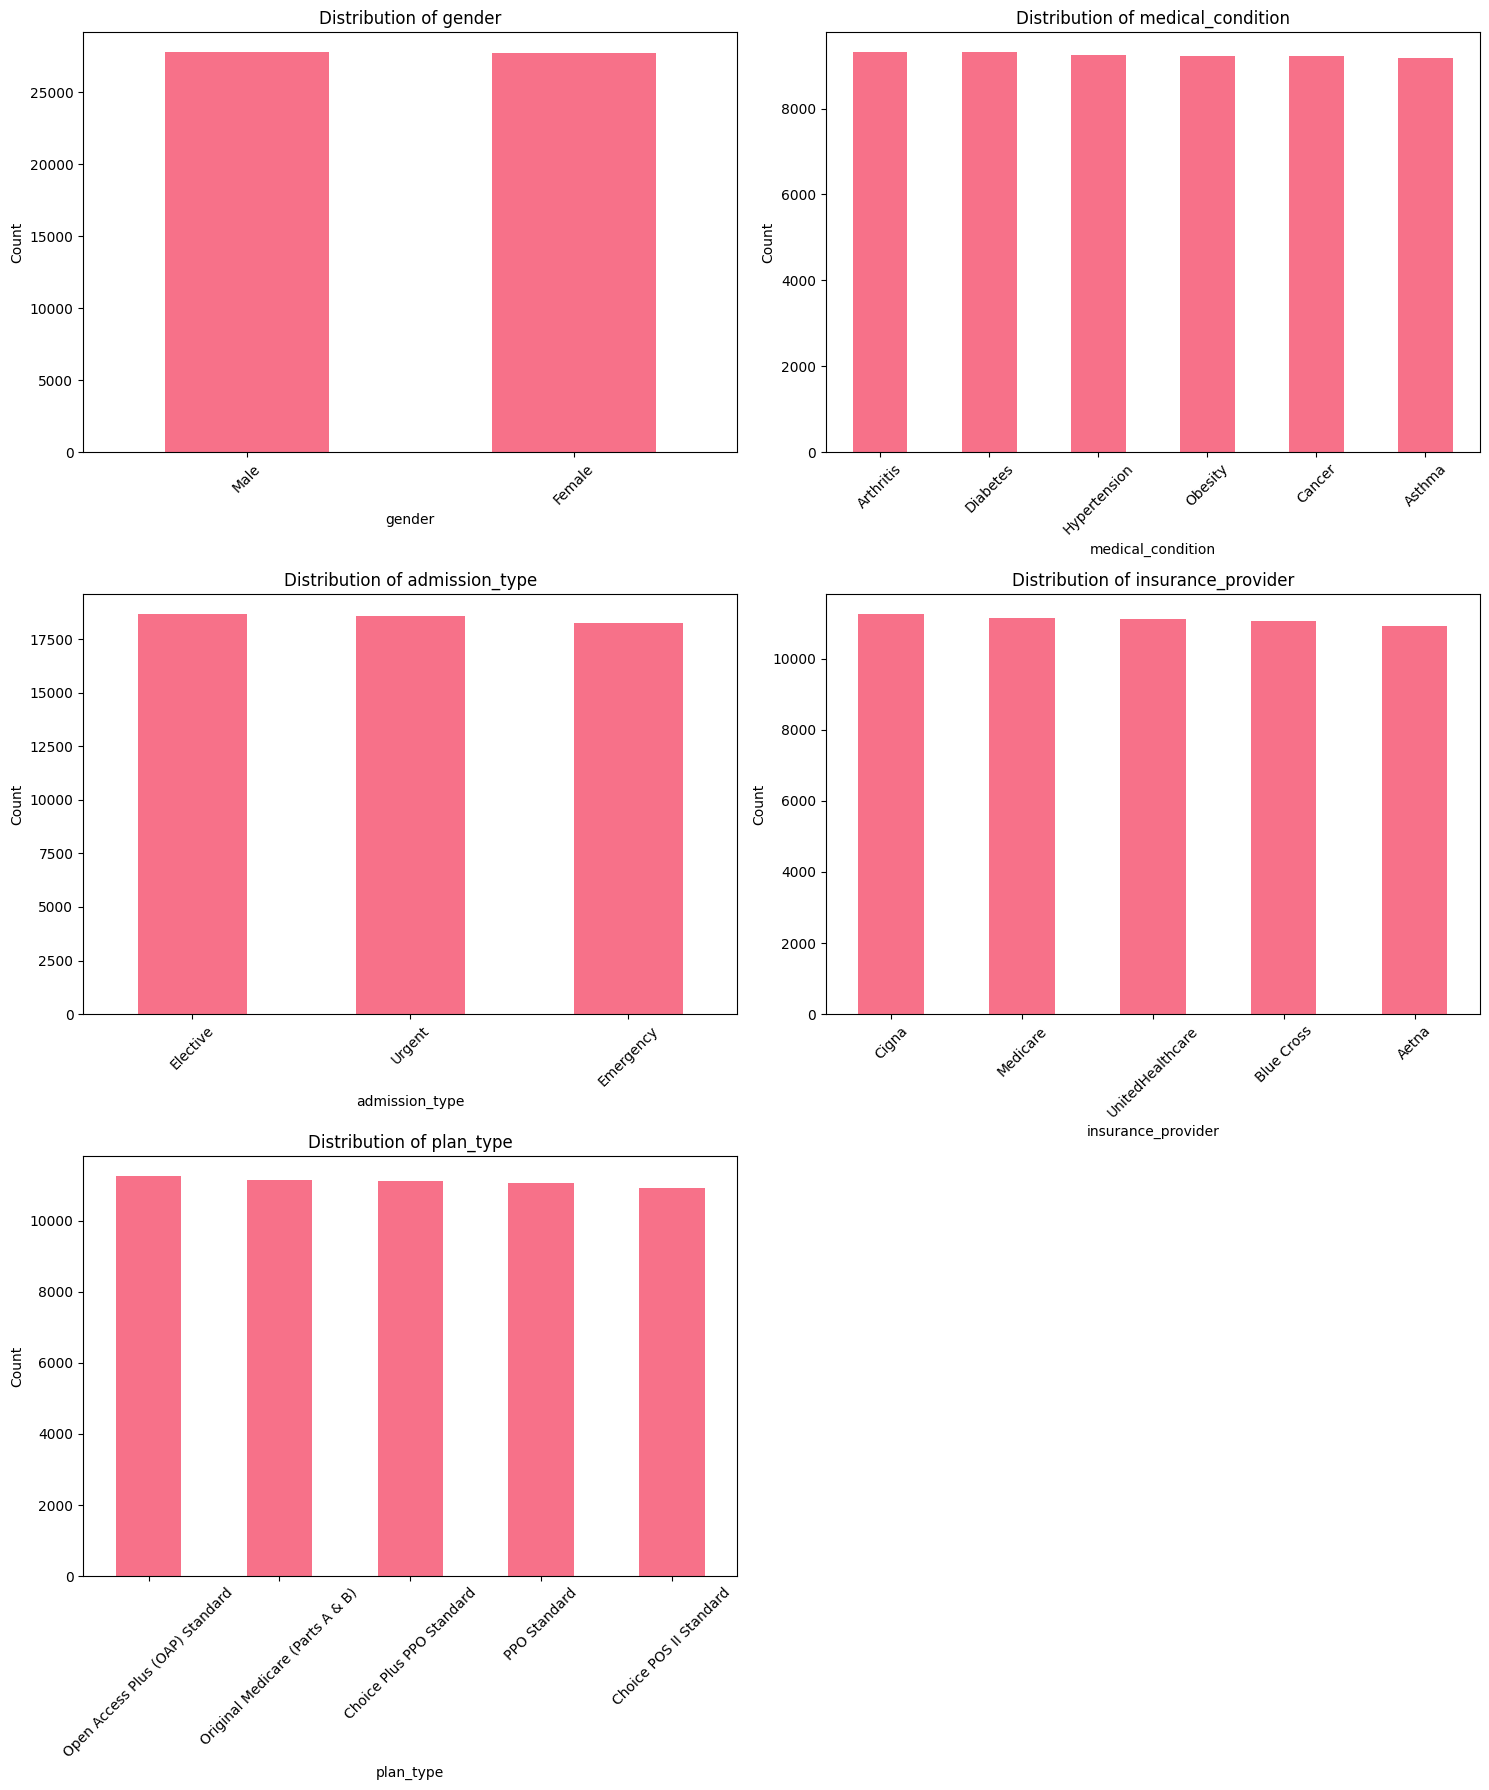

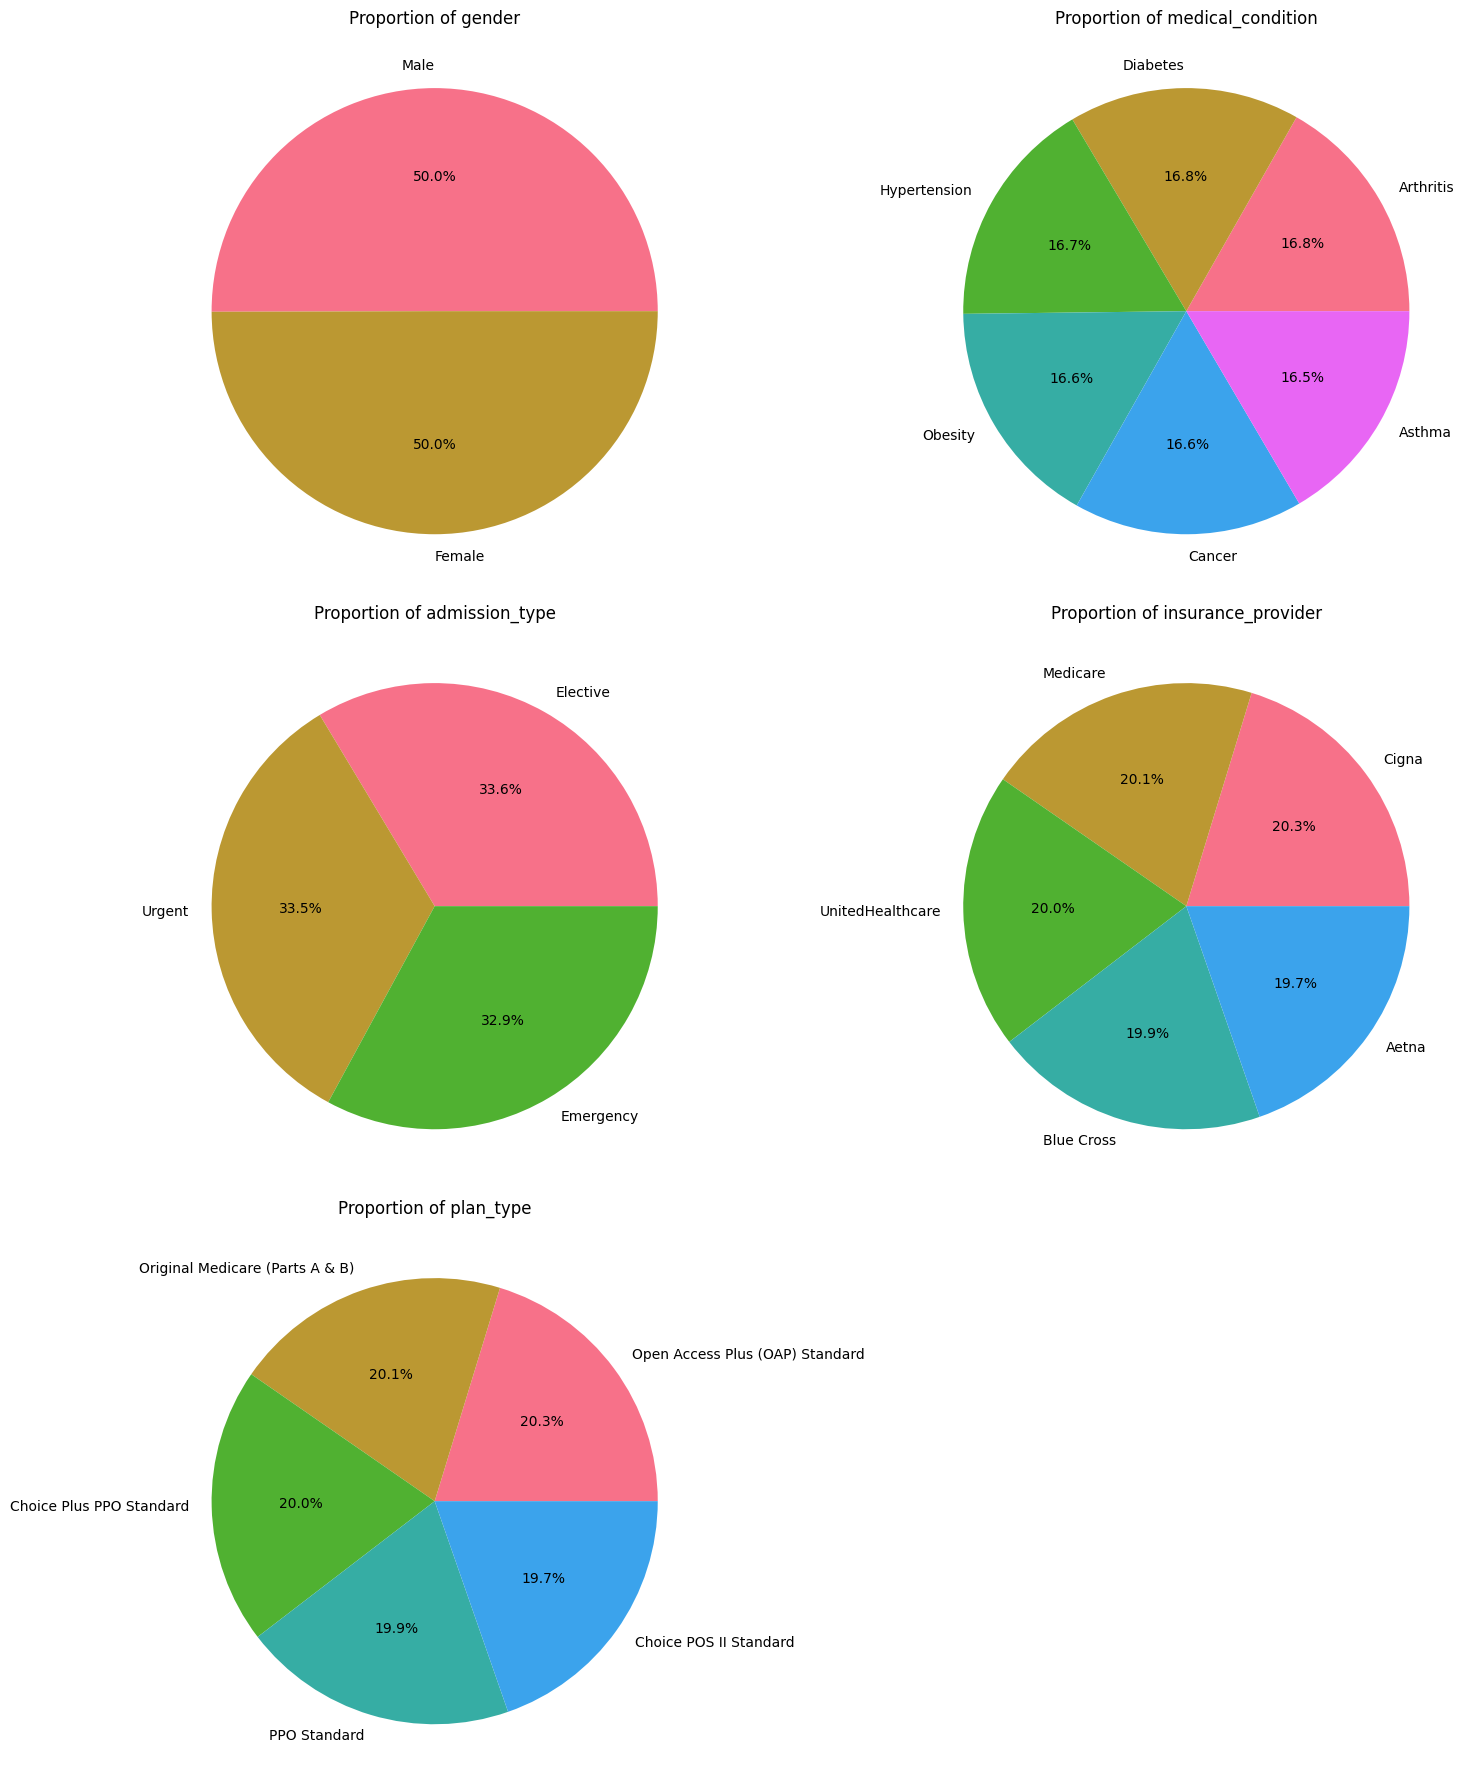

Categorical Variables Frequency Analysis:

GENDER:
  Male: 27,774 (50.0%)
  Female: 27,726 (50.0%)
  Total unique values: 2
  Most common: Male (50.0%)
  Second most common: Female (50.0%)

MEDICAL_CONDITION:
  Arthritis: 9,308 (16.8%)
  Diabetes: 9,304 (16.8%)
  Hypertension: 9,245 (16.7%)
  Obesity: 9,231 (16.6%)
  Cancer: 9,227 (16.6%)
  Asthma: 9,185 (16.5%)
  Total unique values: 6
  Most common: Arthritis (16.8%)
  Second most common: Diabetes (16.8%)

ADMISSION_TYPE:
  Elective: 18,655 (33.6%)
  Urgent: 18,576 (33.5%)
  Emergency: 18,269 (32.9%)
  Total unique values: 3
  Most common: Elective (33.6%)
  Second most common: Urgent (33.5%)

INSURANCE_PROVIDER:
  Cigna: 11,249 (20.3%)
  Medicare: 11,154 (20.1%)
  UnitedHealthcare: 11,125 (20.0%)
  Blue Cross: 11,059 (19.9%)
  Aetna: 10,913 (19.7%)
  Total unique values: 5
  Most common: Cigna (20.3%)
  Second most common: Medicare (20.1%)

PLAN_TYPE:
  Open Access Plus (OAP) Standard: 11,249 (20.3%)
  Original Medicare (Parts A & B

In [14]:
# Univariate analysis for categorical variables
key_categorical = ['gender', 'medical_condition', 'admission_type', 'insurance_provider', 'plan_type']
key_categorical = [col for col in key_categorical if col in categorical_cols]

n_cats = len(key_categorical)
n_cols = 2
n_rows = (n_cats + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 6 * n_rows))
if n_rows == 1:
    axes = [axes] if n_cols == 1 else axes
else:
    axes = axes.flatten()

for i, col in enumerate(key_categorical):
    if i < len(axes):
        value_counts = df[col].value_counts()
        value_counts.plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)

# Hide extra subplots
for i in range(n_cats, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Pie charts for categorical variables with fewer categories
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 6 * n_rows))
if n_rows == 1:
    axes = [axes] if n_cols == 1 else axes
else:
    axes = axes.flatten()

for i, col in enumerate(key_categorical):
    if i < len(axes):
        value_counts = df[col].value_counts()
        if len(value_counts) <= 8:  # Only create pie chart if not too many categories
            axes[i].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
            axes[i].set_title(f'Proportion of {col}')
        else:
            # Create bar chart for variables with many categories
            top_10 = value_counts.head(10)
            top_10.plot(kind='bar', ax=axes[i])
            axes[i].set_title(f'Top 10 {col} (Total: {len(value_counts)} categories)')
            axes[i].tick_params(axis='x', rotation=45)

# Hide extra subplots
for i in range(n_cats, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Detailed frequency analysis
print("Categorical Variables Frequency Analysis:")
print("=" * 80)
for col in key_categorical:
    print(f"\n{col.upper()}:")
    value_counts = df[col].value_counts()
    percentage = (value_counts / len(df)) * 100
    
    for value, count in value_counts.items():
        pct = percentage[value]
        print(f"  {value}: {count:,} ({pct:.1f}%)")
    
    print(f"  Total unique values: {len(value_counts)}")
    print(f"  Most common: {value_counts.index[0]} ({percentage.iloc[0]:.1f}%)")
    if len(value_counts) > 1:
        print(f"  Second most common: {value_counts.index[1]} ({percentage.iloc[1]:.1f}%)")

## 9. Bivariate Analysis - Correlation Matrix

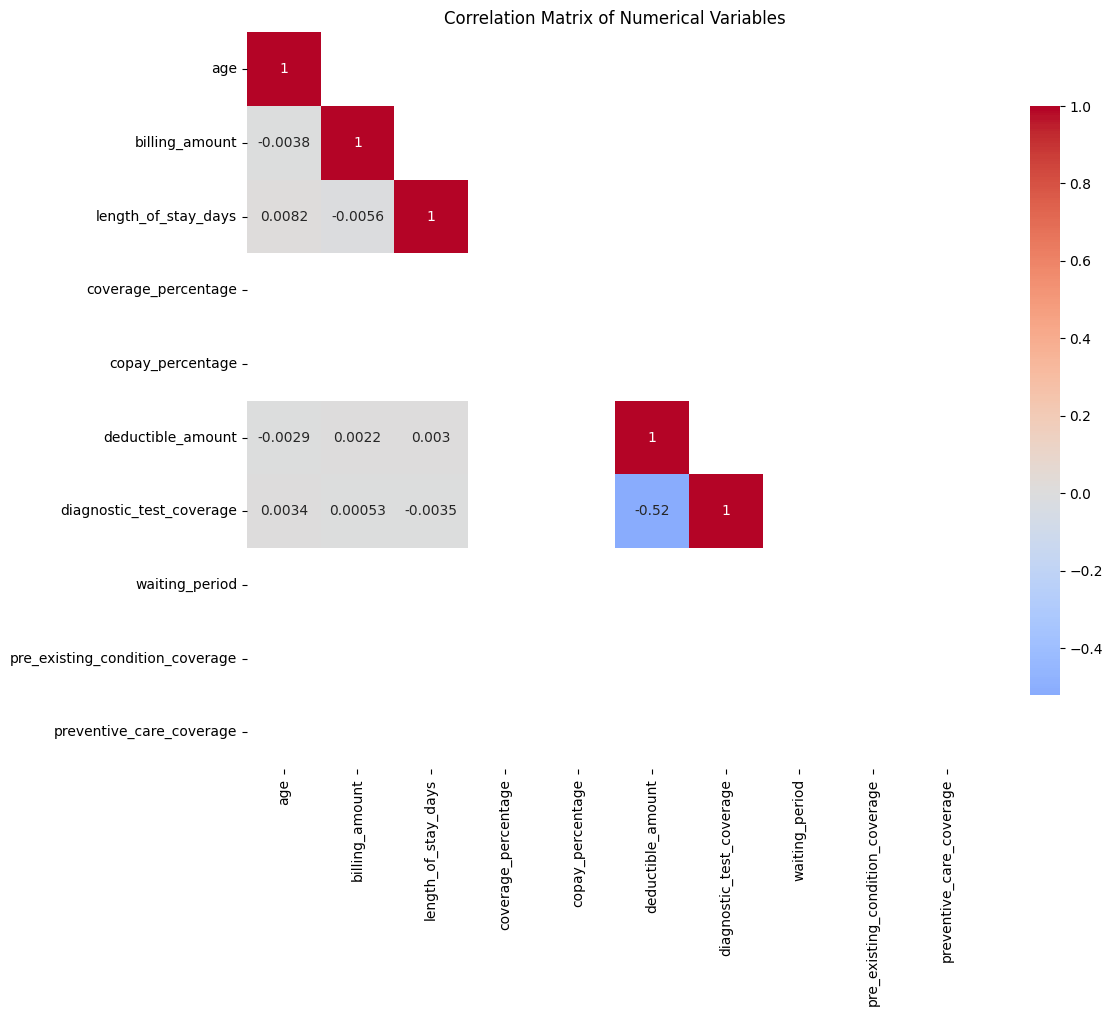

Strong Correlations (|r| > 0.5):
  deductible_amount <-> diagnostic_test_coverage: -0.522 (negative)

Correlations with Billing Amount:
  length_of_stay_days: -0.006
  age: -0.004
  deductible_amount: 0.002
  diagnostic_test_coverage: 0.001
  coverage_percentage: nan
  copay_percentage: nan
  waiting_period: nan
  pre_existing_condition_coverage: nan
  preventive_care_coverage: nan


<Figure size 1500x1200 with 0 Axes>

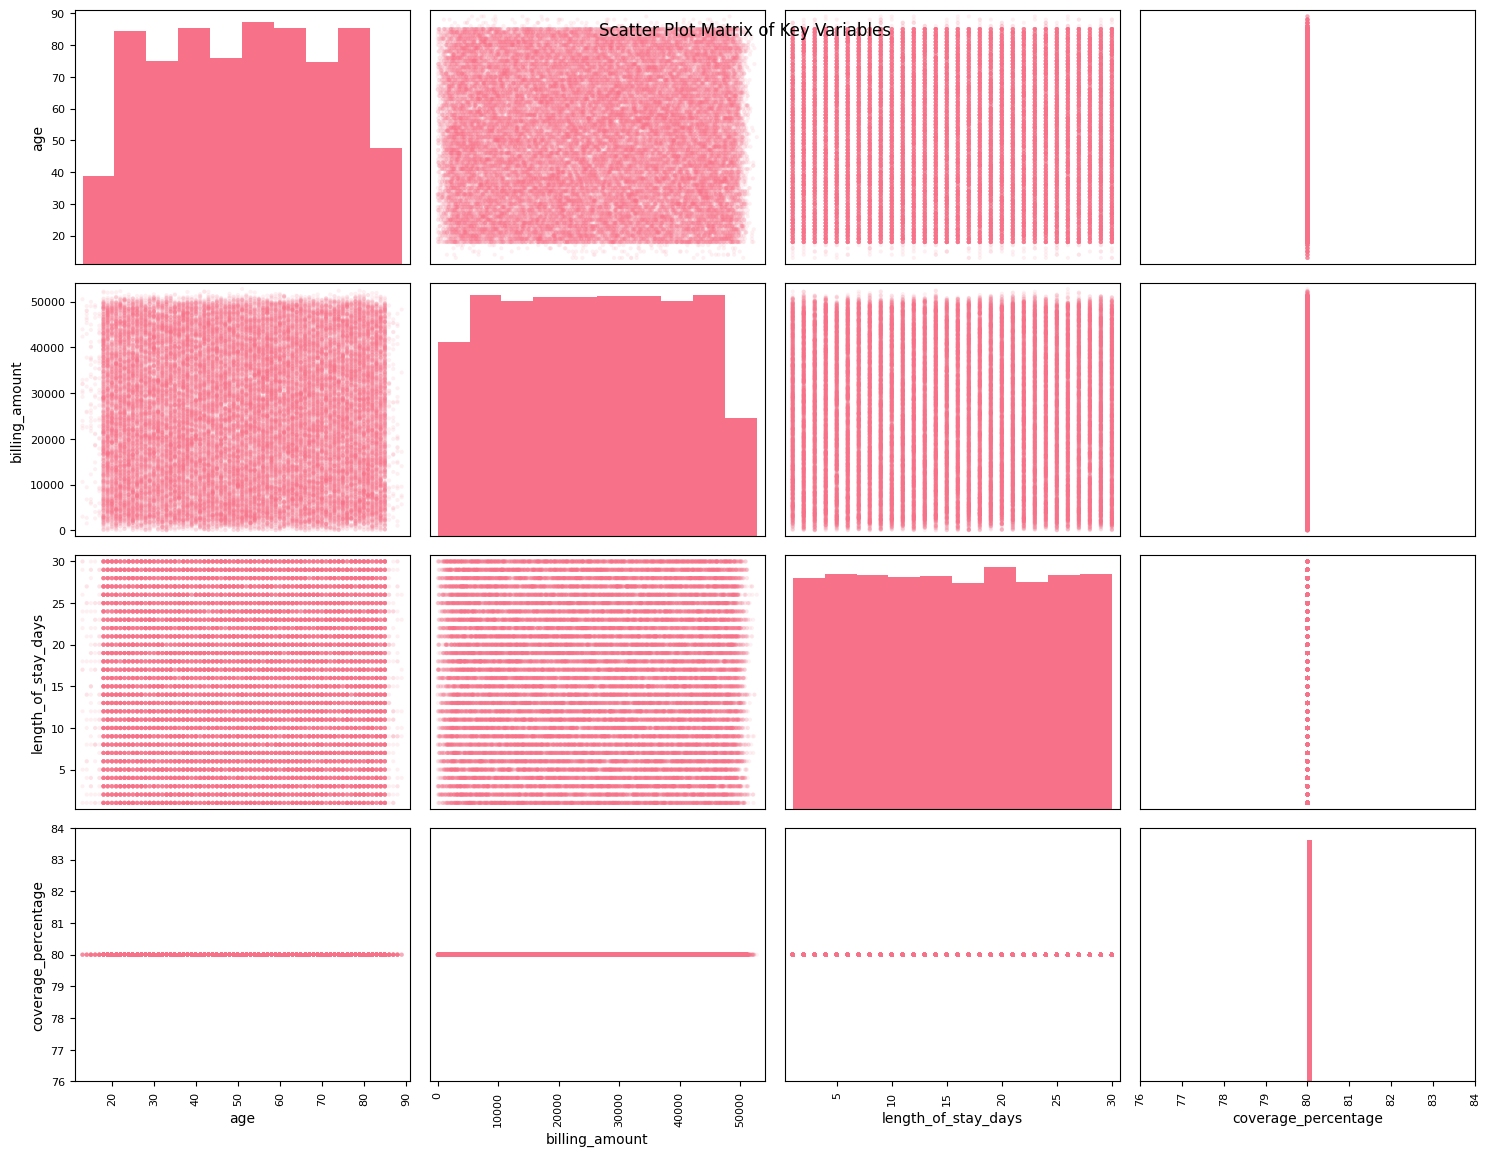

In [15]:
# Correlation analysis for numerical variables
correlation_cols = [col for col in numerical_cols if col not in ['claim_id', 'provider_id']]
correlation_matrix = df[correlation_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(correlation_matrix, k=1)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, mask=mask, cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

# Strong correlations analysis
print("Strong Correlations (|r| > 0.5):")
print("=" * 50)
strong_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.5:
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            strong_corr_pairs.append((var1, var2, corr_val))

if strong_corr_pairs:
    for var1, var2, corr in sorted(strong_corr_pairs, key=lambda x: abs(x[2]), reverse=True):
        direction = "positive" if corr > 0 else "negative"
        print(f"  {var1} <-> {var2}: {corr:.3f} ({direction})")
else:
    print("  No strong correlations found")

# Correlation with target variable (billing_amount)
if 'billing_amount' in correlation_cols:
    print(f"\nCorrelations with Billing Amount:")
    print("=" * 50)
    billing_corr = correlation_matrix['billing_amount'].drop('billing_amount').abs().sort_values(ascending=False)
    for var, corr in billing_corr.items():
        print(f"  {var}: {correlation_matrix['billing_amount'][var]:.3f}")

# Scatter plot matrix for key variables
key_vars_for_scatter = ['age', 'billing_amount', 'length_of_stay_days', 'coverage_percentage']
key_vars_for_scatter = [col for col in key_vars_for_scatter if col in df.columns]

if len(key_vars_for_scatter) >= 2:
    fig = plt.figure(figsize=(15, 12))
    pd.plotting.scatter_matrix(df[key_vars_for_scatter], alpha=0.1, figsize=(15, 12), diagonal='hist')
    plt.suptitle('Scatter Plot Matrix of Key Variables', y=0.95)
    plt.tight_layout()
    plt.show()

## 10. Bivariate Analysis - Categorical vs Numerical


Billing Amount Analysis by GENDER:
        count     mean   median      std   min      max
gender                                                 
Female  27726 25472.66 25425.25 14200.40 23.73 52764.28
Male    27774 25609.74 25681.04 14215.44  9.24 52271.66

ANOVA Test:
  F-statistic: 1.2914
  P-value: 0.2558
  Significant difference: No

Billing Amount Analysis by MEDICAL_CONDITION:
                   count     mean   median      std   min      max
medical_condition                                                 
Arthritis           9308 25498.58 25581.76 14274.29 26.11 52170.04
Asthma              9185 25637.41 25661.87 14237.79 32.35 52181.84
Cancer              9227 25164.18 24910.98 14196.04  9.24 52373.03
Diabetes            9304 25640.13 25621.08 14156.39 31.03 52211.85
Hypertension        9245 25498.99 25275.67 14302.02 23.87 52764.28
Obesity             9231 25808.22 26130.00 14075.41 36.22 52024.73

ANOVA Test:
  F-statistic: 2.1593
  P-value: 0.0556
  Significant differen

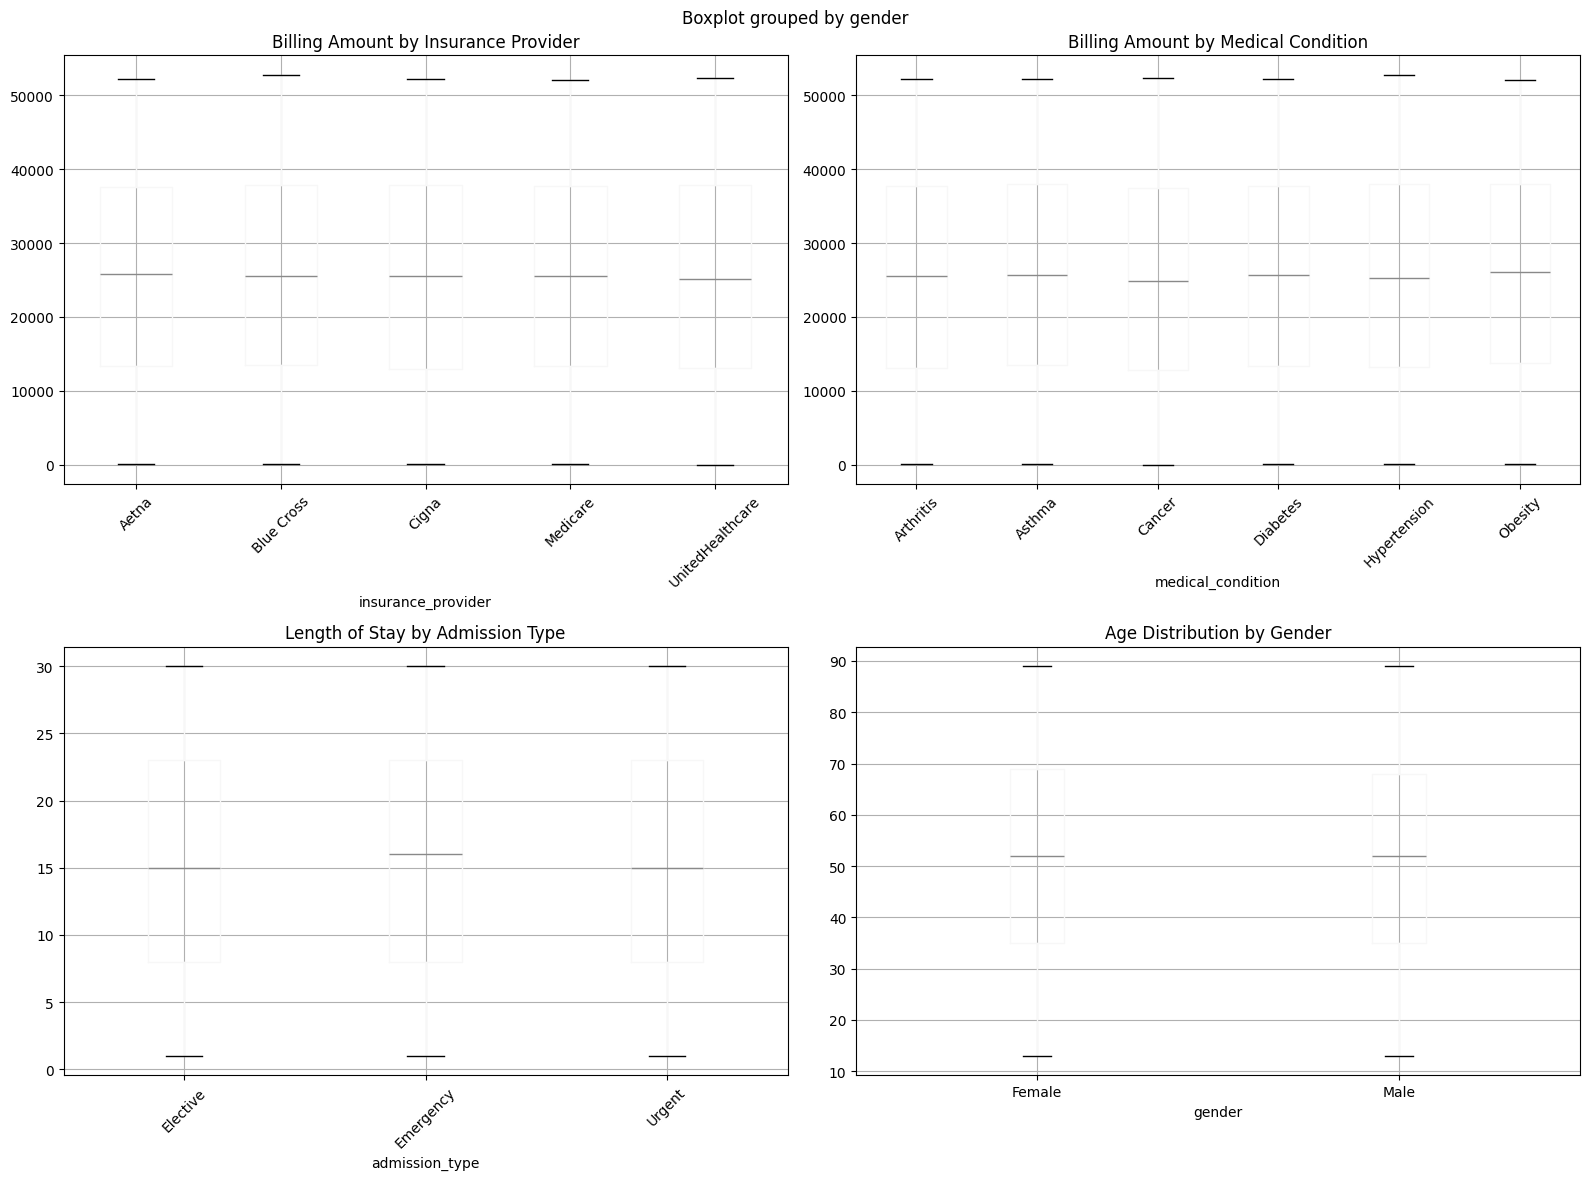


Cross-Tabulation Analysis:

Gender vs Medical Condition:
medical_condition  Arthritis  Asthma  Cancer  Diabetes  Hypertension  Obesity  \
gender                                                                          
Female                  4686    4553    4602      4651          4612     4622   
Male                    4622    4632    4625      4653          4633     4609   
All                     9308    9185    9227      9304          9245     9231   

medical_condition    All  
gender                    
Female             27726  
Male               27774  
All                55500  

Gender vs Medical Condition (Row Percentages):
medical_condition  Arthritis  Asthma  Cancer  Diabetes  Hypertension  Obesity
gender                                                                       
Female                 16.90   16.40   16.60     16.80         16.60    16.70
Male                   16.60   16.70   16.70     16.80         16.70    16.60

Admission Type vs Insurance Provider:
in

In [16]:
# Bivariate analysis: Categorical vs Numerical variables

# Billing amount by different categorical variables
categorical_for_analysis = ['gender', 'medical_condition', 'admission_type', 'insurance_provider']
categorical_for_analysis = [col for col in categorical_for_analysis if col in df.columns]

for cat_var in categorical_for_analysis:
    print(f"\nBilling Amount Analysis by {cat_var.upper()}:")
    print("=" * 60)
    
    grouped_stats = df.groupby(cat_var)['billing_amount'].agg([
        'count', 'mean', 'median', 'std', 'min', 'max'
    ]).round(2)
    print(grouped_stats)
    
    # Statistical test (ANOVA)
    groups = [group['billing_amount'].values for name, group in df.groupby(cat_var)]
    if len(groups) > 1:
        f_stat, p_value = stats.f_oneway(*groups)
        print(f"\nANOVA Test:")
        print(f"  F-statistic: {f_stat:.4f}")
        print(f"  P-value: {p_value:.4f}")
        print(f"  Significant difference: {'Yes' if p_value < 0.05 else 'No'}")

# Visualizations for key relationships
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Billing amount by insurance provider
if 'insurance_provider' in df.columns:
    df.boxplot(column='billing_amount', by='insurance_provider', ax=axes[0,0])
    axes[0,0].set_title('Billing Amount by Insurance Provider')
    axes[0,0].tick_params(axis='x', rotation=45)

# 2. Billing amount by medical condition
if 'medical_condition' in df.columns:
    df.boxplot(column='billing_amount', by='medical_condition', ax=axes[0,1])
    axes[0,1].set_title('Billing Amount by Medical Condition')
    axes[0,1].tick_params(axis='x', rotation=45)

# 3. Length of stay by admission type
if 'admission_type' in df.columns and 'length_of_stay_days' in df.columns:
    df.boxplot(column='length_of_stay_days', by='admission_type', ax=axes[1,0])
    axes[1,0].set_title('Length of Stay by Admission Type')
    axes[1,0].tick_params(axis='x', rotation=45)

# 4. Age by gender
if 'gender' in df.columns:
    df.boxplot(column='age', by='gender', ax=axes[1,1])
    axes[1,1].set_title('Age Distribution by Gender')

plt.tight_layout()
plt.show()

# Cross-tabulation analysis
print("\nCross-Tabulation Analysis:")
print("=" * 60)

if 'gender' in df.columns and 'medical_condition' in df.columns:
    crosstab = pd.crosstab(df['gender'], df['medical_condition'], margins=True)
    print("\nGender vs Medical Condition:")
    print(crosstab)
    
    # Normalized cross-tabulation (percentages)
    crosstab_pct = pd.crosstab(df['gender'], df['medical_condition'], normalize='index') * 100
    print("\nGender vs Medical Condition (Row Percentages):")
    print(crosstab_pct.round(1))

if 'admission_type' in df.columns and 'insurance_provider' in df.columns:
    crosstab2 = pd.crosstab(df['admission_type'], df['insurance_provider'], margins=True)
    print("\nAdmission Type vs Insurance Provider:")
    print(crosstab2)

## 11. Distribution Analysis

Distribution Analysis and Normality Tests:

AGE:
  Mean: 51.54
  Median: 52.00
  Standard Deviation: 19.60
  Skewness: -0.006
  Kurtosis: -1.186
  Normality Test (D'Agostino):
    Statistic: 43159.7167
    P-value: 0.0000
    Normal distribution: No
  Distribution shape: approximately symmetric (left-skewed)

BILLING_AMOUNT:
  Mean: 25541.26
  Median: 25538.07
  Standard Deviation: 14207.96
  Skewness: -0.000
  Kurtosis: -1.192
  Normality Test (D'Agostino):
    Statistic: 45679.8673
    P-value: 0.0000
    Normal distribution: No
  Distribution shape: approximately symmetric (left-skewed)

LENGTH_OF_STAY_DAYS:
  Mean: 15.51
  Median: 15.00
  Standard Deviation: 8.66
  Skewness: 0.002
  Kurtosis: -1.205
  Normality Test (D'Agostino):
    Statistic: 51537.4846
    P-value: 0.0000
    Normal distribution: No
  Distribution shape: approximately symmetric (right-skewed)

COVERAGE_PERCENTAGE:
  Mean: 80.00
  Median: 80.00
  Standard Deviation: 0.00
  Skewness: nan
  Kurtosis: nan
  Normalit

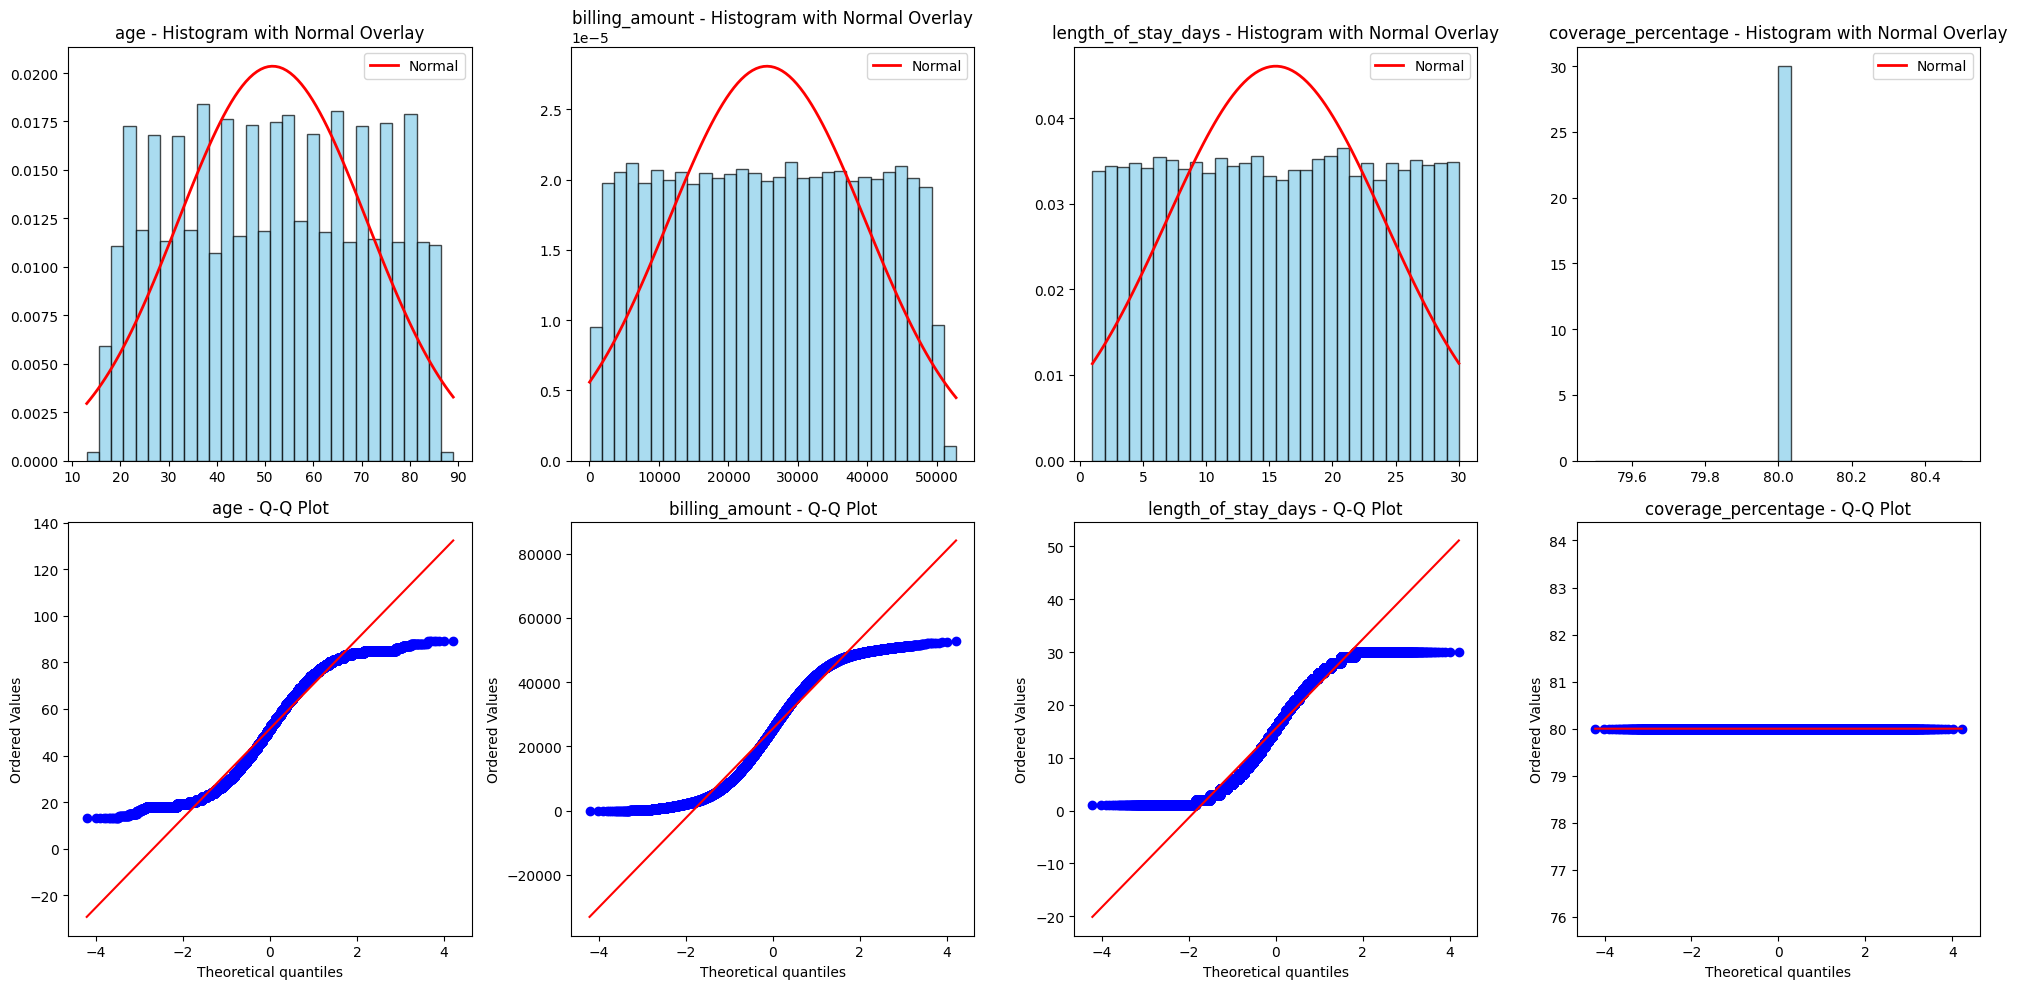


Normality Test Summary:
              Variable  Skewness  Kurtosis  Normal  P_value
0                  age     -0.01     -1.19   False     0.00
1       billing_amount     -0.00     -1.19   False     0.00
2  length_of_stay_days      0.00     -1.21   False     0.00
3  coverage_percentage       NaN       NaN   False      NaN

Log Transformation Analysis for Skewed Variables:
No highly skewed variables found (|skewness| > 1)


In [17]:
# Distribution analysis and normality tests
key_numerical_vars = ['age', 'billing_amount', 'length_of_stay_days', 'coverage_percentage']
key_numerical_vars = [col for col in key_numerical_vars if col in df.columns]

print("Distribution Analysis and Normality Tests:")
print("=" * 80)

normality_results = []

for col in key_numerical_vars:
    print(f"\n{col.upper()}:")
    
    # Basic distribution statistics
    data = df[col].dropna()
    mean_val = data.mean()
    median_val = data.median()
    std_val = data.std()
    skew_val = skew(data)
    kurt_val = kurtosis(data)
    
    print(f"  Mean: {mean_val:.2f}")
    print(f"  Median: {median_val:.2f}")
    print(f"  Standard Deviation: {std_val:.2f}")
    print(f"  Skewness: {skew_val:.3f}")
    print(f"  Kurtosis: {kurt_val:.3f}")
    
    # Normality test
    stat, p_value = normaltest(data)
    is_normal = p_value > 0.05
    
    print(f"  Normality Test (D'Agostino):")
    print(f"    Statistic: {stat:.4f}")
    print(f"    P-value: {p_value:.4f}")
    print(f"    Normal distribution: {'Yes' if is_normal else 'No'}")
    
    # Interpretation of skewness
    if abs(skew_val) < 0.5:
        skew_interp = "approximately symmetric"
    elif abs(skew_val) < 1:
        skew_interp = "moderately skewed"
    else:
        skew_interp = "highly skewed"
    
    direction = "right" if skew_val > 0 else "left"
    print(f"  Distribution shape: {skew_interp} ({direction}-skewed)")
    
    normality_results.append({
        'Variable': col,
        'Skewness': skew_val,
        'Kurtosis': kurt_val,
        'Normal': is_normal,
        'P_value': p_value
    })

# Distribution plots
fig, axes = plt.subplots(2, len(key_numerical_vars), figsize=(5*len(key_numerical_vars), 10))
if len(key_numerical_vars) == 1:
    axes = axes.reshape(-1, 1)

for i, col in enumerate(key_numerical_vars):
    data = df[col].dropna()
    
    # Histogram with normal overlay
    axes[0, i].hist(data, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
    
    # Normal distribution overlay
    mu, sigma = data.mean(), data.std()
    x = np.linspace(data.min(), data.max(), 100)
    axes[0, i].plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2, label='Normal')
    axes[0, i].set_title(f'{col} - Histogram with Normal Overlay')
    axes[0, i].legend()
    
    # Q-Q plot
    stats.probplot(data, dist="norm", plot=axes[1, i])
    axes[1, i].set_title(f'{col} - Q-Q Plot')

plt.tight_layout()
plt.show()

# Summary of normality tests
normality_df = pd.DataFrame(normality_results)
print("\nNormality Test Summary:")
print("=" * 60)
print(normality_df)

# Log transformation for highly skewed variables
print("\nLog Transformation Analysis for Skewed Variables:")
print("=" * 60)

highly_skewed = [col for col in key_numerical_vars if abs(df[col].skew()) > 1]

if highly_skewed:
    fig, axes = plt.subplots(len(highly_skewed), 2, figsize=(12, 4*len(highly_skewed)))
    if len(highly_skewed) == 1:
        axes = axes.reshape(1, -1)
    
    for i, col in enumerate(highly_skewed):
        data = df[col].dropna()
        
        # Original distribution
        axes[i, 0].hist(data, bins=30, alpha=0.7, edgecolor='black')
        axes[i, 0].set_title(f'{col} - Original Distribution')
        axes[i, 0].set_xlabel(col)
        
        # Log-transformed distribution (add small constant to handle zeros)
        log_data = np.log(data + 1)
        axes[i, 1].hist(log_data, bins=30, alpha=0.7, edgecolor='black', color='orange')
        axes[i, 1].set_title(f'{col} - Log Transformed')
        axes[i, 1].set_xlabel(f'log({col} + 1)')
        
        # Print improvement in skewness
        original_skew = skew(data)
        log_skew = skew(log_data)
        print(f"{col}:")
        print(f"  Original skewness: {original_skew:.3f}")
        print(f"  Log-transformed skewness: {log_skew:.3f}")
        print(f"  Improvement: {abs(original_skew) - abs(log_skew):.3f}")
    
    plt.tight_layout()
    plt.show()
else:
    print("No highly skewed variables found (|skewness| > 1)")

## 12. Outlier Detection and Analysis

Outlier Detection Analysis:

AGE:
  Total observations: 55,500
  IQR method: 0 outliers (0.00%)
  Z-score method: 0 outliers (0.00%)
  Modified Z-score: 0 outliers (0.00%)
  Range: 13.00 to 89.00
  IQR bounds: -14.50 to 117.50

BILLING_AMOUNT:
  Total observations: 55,500
  IQR method: 0 outliers (0.00%)
  Z-score method: 0 outliers (0.00%)
  Modified Z-score: 0 outliers (0.00%)
  Range: 9.24 to 52764.28
  IQR bounds: -23627.70 to 74689.43

LENGTH_OF_STAY_DAYS:
  Total observations: 55,500
  IQR method: 0 outliers (0.00%)
  Z-score method: 0 outliers (0.00%)
  Modified Z-score: 0 outliers (0.00%)
  Range: 1.00 to 30.00
  IQR bounds: -14.50 to 45.50


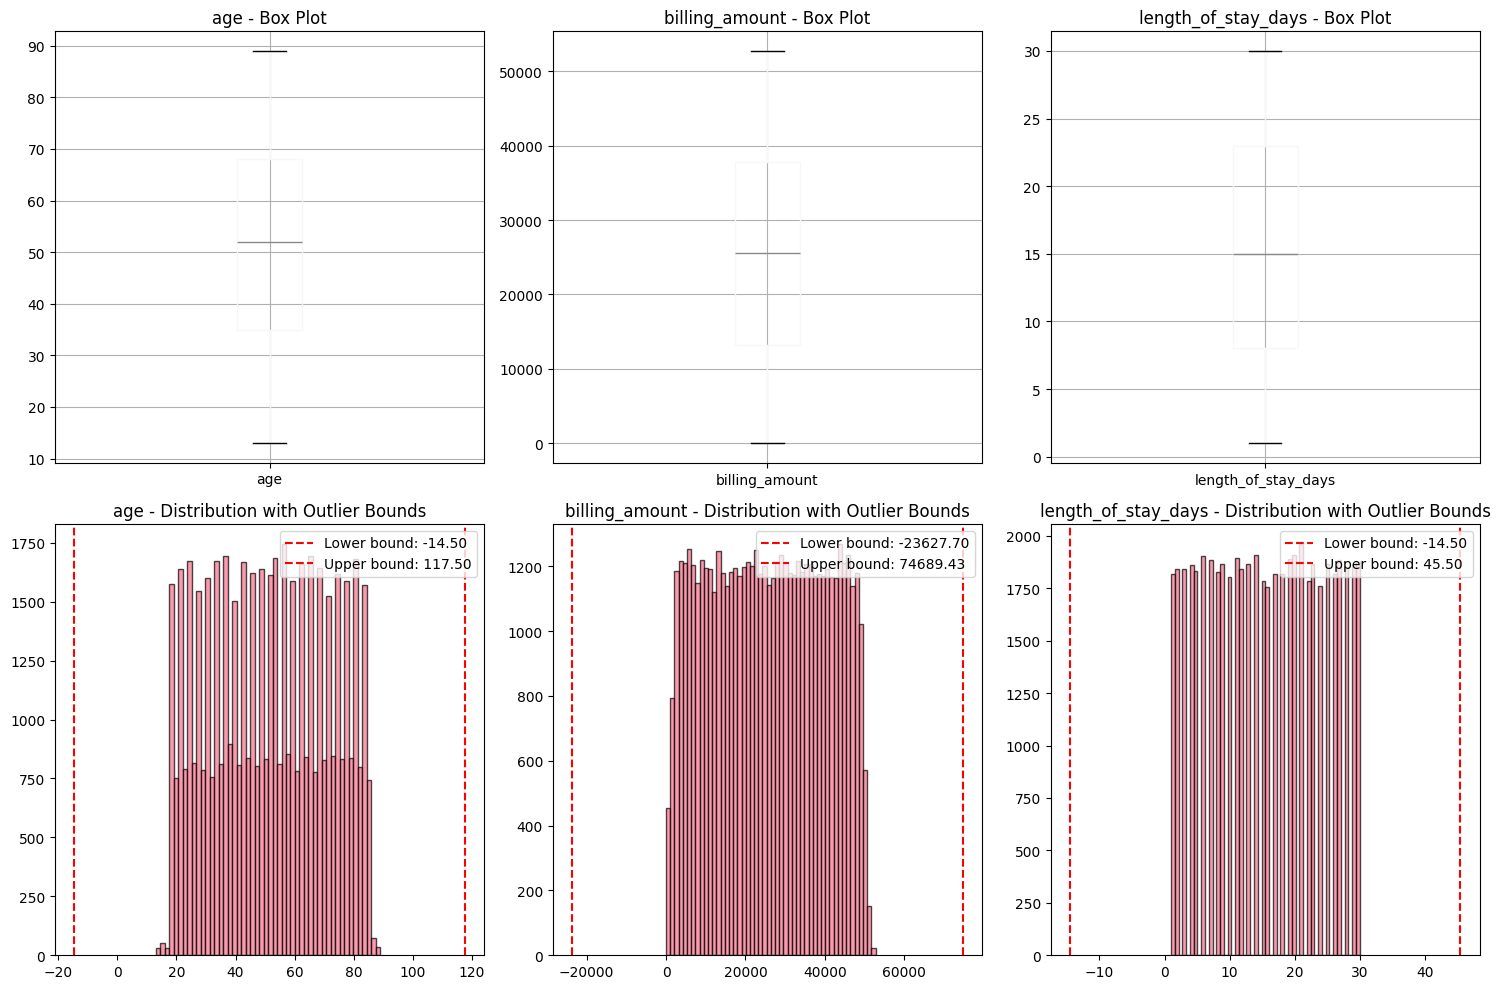


Outlier Summary Table:
              Variable  Total_Obs  IQR_Outliers  IQR_Percentage  Z_Outliers  \
0                  age      55500             0            0.00           0   
1       billing_amount      55500             0            0.00           0   
2  length_of_stay_days      55500             0            0.00           0   

   Z_Percentage  
0          0.00  
1          0.00  
2          0.00  

Impact of Outliers on Statistical Measures:

AGE:
  With outliers    - Mean: 51.54, Std: 19.60
  Without outliers - Mean: 51.54, Std: 19.60
  Change in mean: 0.00%
  Change in std: 0.00%

BILLING_AMOUNT:
  With outliers    - Mean: 25541.26, Std: 14207.96
  Without outliers - Mean: 25541.26, Std: 14207.96
  Change in mean: 0.00%
  Change in std: 0.00%

LENGTH_OF_STAY_DAYS:
  With outliers    - Mean: 15.51, Std: 8.66
  Without outliers - Mean: 15.51, Std: 8.66
  Change in mean: 0.00%
  Change in std: 0.00%

Extreme Outliers (top 5 highest values):

AGE:
 claim_id  age medical_condi

In [18]:
# Outlier detection and analysis
key_vars_outliers = ['age', 'billing_amount', 'length_of_stay_days']
key_vars_outliers = [col for col in key_vars_outliers if col in df.columns]

print("Outlier Detection Analysis:")
print("=" * 60)

outlier_summary = []

for col in key_vars_outliers:
    data = df[col].dropna()
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # IQR method
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    iqr_outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    # Z-score method (threshold = 3)
    z_scores = np.abs(stats.zscore(data))
    z_outliers = data[z_scores > 3]
    
    # Modified Z-score method
    median = data.median()
    mad = np.median(np.abs(data - median))
    modified_z_scores = 0.6745 * (data - median) / mad
    modified_z_outliers = data[np.abs(modified_z_scores) > 3.5]
    
    print(f"\n{col.upper()}:")
    print(f"  Total observations: {len(data):,}")
    print(f"  IQR method: {len(iqr_outliers):,} outliers ({len(iqr_outliers)/len(data)*100:.2f}%)")
    print(f"  Z-score method: {len(z_outliers):,} outliers ({len(z_outliers)/len(data)*100:.2f}%)")
    print(f"  Modified Z-score: {len(modified_z_outliers):,} outliers ({len(modified_z_outliers)/len(data)*100:.2f}%)")
    print(f"  Range: {data.min():.2f} to {data.max():.2f}")
    print(f"  IQR bounds: {lower_bound:.2f} to {upper_bound:.2f}")
    
    if len(iqr_outliers) > 0:
        print(f"  Outlier range (IQR): {iqr_outliers.min():.2f} to {iqr_outliers.max():.2f}")
    
    outlier_summary.append({
        'Variable': col,
        'Total_Obs': len(data),
        'IQR_Outliers': len(iqr_outliers),
        'IQR_Percentage': len(iqr_outliers)/len(data)*100,
        'Z_Outliers': len(z_outliers),
        'Z_Percentage': len(z_outliers)/len(data)*100
    })

# Outlier visualization
fig, axes = plt.subplots(2, len(key_vars_outliers), figsize=(5*len(key_vars_outliers), 10))
if len(key_vars_outliers) == 1:
    axes = axes.reshape(-1, 1)

for i, col in enumerate(key_vars_outliers):
    # Box plot
    df.boxplot(column=col, ax=axes[0, i])
    axes[0, i].set_title(f'{col} - Box Plot')
    
    # Histogram with outlier boundaries
    data = df[col].dropna()
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    axes[1, i].hist(data, bins=50, alpha=0.7, edgecolor='black')
    axes[1, i].axvline(lower_bound, color='red', linestyle='--', label=f'Lower bound: {lower_bound:.2f}')
    axes[1, i].axvline(upper_bound, color='red', linestyle='--', label=f'Upper bound: {upper_bound:.2f}')
    axes[1, i].set_title(f'{col} - Distribution with Outlier Bounds')
    axes[1, i].legend()

plt.tight_layout()
plt.show()

# Outlier summary table
outlier_df = pd.DataFrame(outlier_summary)
print("\nOutlier Summary Table:")
print("=" * 60)
print(outlier_df)

# Impact of outliers on statistical measures
print("\nImpact of Outliers on Statistical Measures:")
print("=" * 60)

for col in key_vars_outliers:
    data = df[col].dropna()
    
    # Remove IQR outliers
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_no_outliers = data[(data >= lower_bound) & (data <= upper_bound)]
    
    print(f"\n{col.upper()}:")
    print(f"  With outliers    - Mean: {data.mean():.2f}, Std: {data.std():.2f}")
    print(f"  Without outliers - Mean: {data_no_outliers.mean():.2f}, Std: {data_no_outliers.std():.2f}")
    print(f"  Change in mean: {((data_no_outliers.mean() - data.mean()) / data.mean() * 100):.2f}%")
    print(f"  Change in std: {((data_no_outliers.std() - data.std()) / data.std() * 100):.2f}%")

# Identify extreme outliers for further investigation
print("\nExtreme Outliers (top 5 highest values):")
print("=" * 60)
for col in key_vars_outliers:
    extreme_outliers = df.nlargest(5, col)[['claim_id', col] + 
                                          (['medical_condition', 'insurance_provider'] 
                                           if 'medical_condition' in df.columns and 'insurance_provider' in df.columns 
                                           else [])]
    print(f"\n{col.upper()}:")
    print(extreme_outliers.to_string(index=False))

## 13. Feature Relationships and Patterns

Healthcare Cost Patterns by Age Group:
           count     mean   median      std
age_group                                  
0-17         888 26757.93 27622.99 14287.76
18-34      13644 25524.09 25312.59 14180.55
35-49      12301 25523.84 25458.14 14308.56
50-64      12417 25642.29 25876.49 14174.88
65+        16250 25425.17 25427.01 14173.51


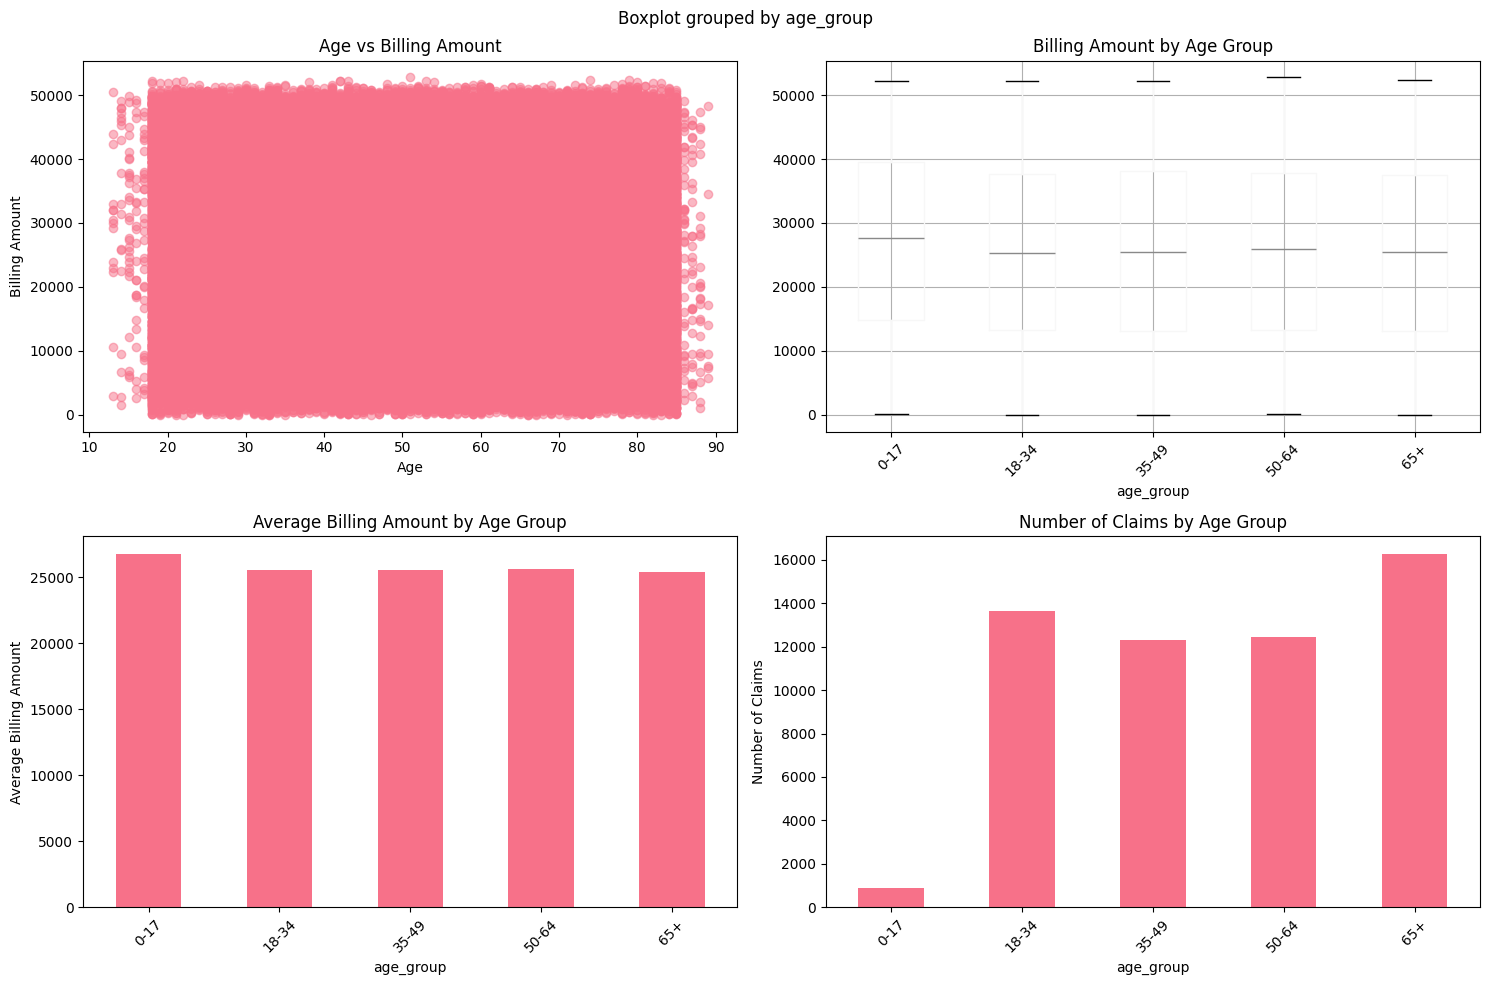


Medical Condition Cost Analysis:
                  billing_amount                             \
                           count     mean   median      std   
medical_condition                                             
Arthritis                   9308 25498.58 25581.76 14274.29   
Asthma                      9185 25637.41 25661.87 14237.79   
Cancer                      9227 25164.18 24910.98 14196.04   
Diabetes                    9304 25640.13 25621.08 14156.39   
Hypertension                9245 25498.99 25275.67 14302.02   
Obesity                     9231 25808.22 26130.00 14075.41   

                  length_of_stay_days          age         
                                 mean median  mean median  
medical_condition                                          
Arthritis                       15.52  15.00 51.57  52.00  
Asthma                          15.70  16.00 51.58  52.00  
Cancer                          15.50  15.00 51.56  52.00  
Diabetes                        15.42 

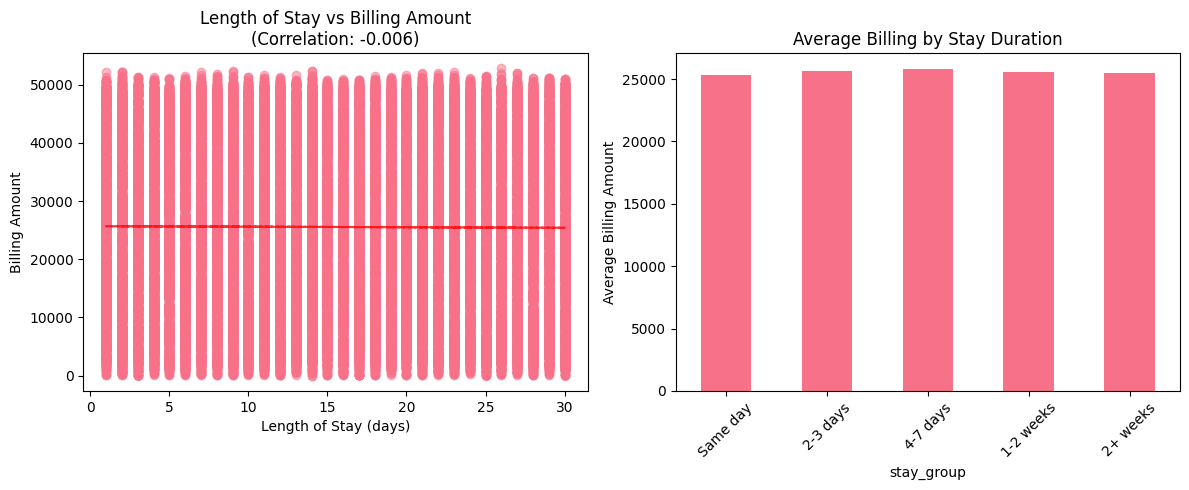


Advanced Pattern Analysis:
High-cost claims analysis (top 10% - above $45,162.99):
  Number of high-cost claims: 5,550
  Percentage of total claims: 10.0%
  Average high-cost claim: $47,710.82

Most common conditions in high-cost claims:
  Hypertension: 973 (17.5%)
  Arthritis: 960 (17.3%)
  Asthma: 935 (16.8%)
  Diabetes: 926 (16.7%)
  Obesity: 879 (15.8%)

Admission Type Analysis:
               billing_amount                   length_of_stay_days   age
                        count     mean   median                mean  mean
admission_type                                                           
Elective                18655 25604.62 25656.93               15.53 51.42
Emergency               18269 25498.69 25379.57               15.60 51.55
Urgent                  18576 25519.50 25550.37               15.41 51.65


In [19]:
# Advanced feature relationships and pattern analysis

# Healthcare cost patterns by age groups
if 'age' in df.columns and 'billing_amount' in df.columns:
    # Create age groups
    df['age_group'] = pd.cut(df['age'], bins=[0, 18, 35, 50, 65, 100], 
                            labels=['0-17', '18-34', '35-49', '50-64', '65+'])
    
    print("Healthcare Cost Patterns by Age Group:")
    print("=" * 60)
    age_analysis = df.groupby('age_group')['billing_amount'].agg([
        'count', 'mean', 'median', 'std'
    ]).round(2)
    print(age_analysis)
    
    # Visualization
    plt.figure(figsize=(15, 10))
    
    # Age vs billing amount scatter plot
    plt.subplot(2, 2, 1)
    plt.scatter(df['age'], df['billing_amount'], alpha=0.5)
    plt.xlabel('Age')
    plt.ylabel('Billing Amount')
    plt.title('Age vs Billing Amount')
    
    # Box plot by age groups
    plt.subplot(2, 2, 2)
    df.boxplot(column='billing_amount', by='age_group', ax=plt.gca())
    plt.title('Billing Amount by Age Group')
    plt.xticks(rotation=45)
    
    # Average billing by age group
    plt.subplot(2, 2, 3)
    age_avg = df.groupby('age_group')['billing_amount'].mean()
    age_avg.plot(kind='bar')
    plt.title('Average Billing Amount by Age Group')
    plt.xticks(rotation=45)
    plt.ylabel('Average Billing Amount')
    
    # Count by age group
    plt.subplot(2, 2, 4)
    age_count = df['age_group'].value_counts().sort_index()
    age_count.plot(kind='bar')
    plt.title('Number of Claims by Age Group')
    plt.xticks(rotation=45)
    plt.ylabel('Number of Claims')
    
    plt.tight_layout()
    plt.show()

# Medical condition cost analysis
if 'medical_condition' in df.columns and 'billing_amount' in df.columns:
    print("\nMedical Condition Cost Analysis:")
    print("=" * 60)
    
    condition_stats = df.groupby('medical_condition').agg({
        'billing_amount': ['count', 'mean', 'median', 'std'],
        'length_of_stay_days': ['mean', 'median'] if 'length_of_stay_days' in df.columns else ['count'],
        'age': ['mean', 'median']
    }).round(2)
    
    print(condition_stats)
    
    # Most expensive conditions
    condition_costs = df.groupby('medical_condition')['billing_amount'].mean().sort_values(ascending=False)
    print(f"\nMost Expensive Conditions (Average Billing):")
    for condition, cost in condition_costs.items():
        print(f"  {condition}: ${cost:,.2f}")

# Insurance provider analysis
if 'insurance_provider' in df.columns:
    print("\nInsurance Provider Analysis:")
    print("=" * 60)
    
    provider_stats = df.groupby('insurance_provider').agg({
        'billing_amount': ['count', 'mean', 'median'],
        'coverage_percentage': ['mean'] if 'coverage_percentage' in df.columns else ['count'],
        'deductible_amount': ['mean'] if 'deductible_amount' in df.columns else ['count']
    }).round(2)
    
    print(provider_stats)

# Correlation between length of stay and costs
if 'length_of_stay_days' in df.columns and 'billing_amount' in df.columns:
    print(f"\nLength of Stay vs Billing Amount:")
    print("=" * 60)
    
    # Correlation
    correlation = df['length_of_stay_days'].corr(df['billing_amount'])
    print(f"Correlation coefficient: {correlation:.3f}")
    
    # Create stay duration groups
    df['stay_group'] = pd.cut(df['length_of_stay_days'], 
                             bins=[0, 1, 3, 7, 14, 100], 
                             labels=['Same day', '2-3 days', '4-7 days', '1-2 weeks', '2+ weeks'])
    
    stay_analysis = df.groupby('stay_group')['billing_amount'].agg([
        'count', 'mean', 'median'
    ]).round(2)
    print(stay_analysis)
    
    # Scatter plot with trend line
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.scatter(df['length_of_stay_days'], df['billing_amount'], alpha=0.5)
    
    # Add trend line
    z = np.polyfit(df['length_of_stay_days'], df['billing_amount'], 1)
    p = np.poly1d(z)
    plt.plot(df['length_of_stay_days'], p(df['length_of_stay_days']), "r--", alpha=0.8)
    
    plt.xlabel('Length of Stay (days)')
    plt.ylabel('Billing Amount')
    plt.title(f'Length of Stay vs Billing Amount\n(Correlation: {correlation:.3f})')
    
    plt.subplot(1, 2, 2)
    stay_avg = df.groupby('stay_group')['billing_amount'].mean()
    stay_avg.plot(kind='bar')
    plt.title('Average Billing by Stay Duration')
    plt.xticks(rotation=45)
    plt.ylabel('Average Billing Amount')
    
    plt.tight_layout()
    plt.show()

# Advanced pattern analysis
print("\nAdvanced Pattern Analysis:")
print("=" * 60)

# High-cost claims analysis
if 'billing_amount' in df.columns:
    high_cost_threshold = df['billing_amount'].quantile(0.9)
    high_cost_claims = df[df['billing_amount'] >= high_cost_threshold]
    
    print(f"High-cost claims analysis (top 10% - above ${high_cost_threshold:,.2f}):")
    print(f"  Number of high-cost claims: {len(high_cost_claims):,}")
    print(f"  Percentage of total claims: {len(high_cost_claims)/len(df)*100:.1f}%")
    print(f"  Average high-cost claim: ${high_cost_claims['billing_amount'].mean():,.2f}")
    
    if 'medical_condition' in df.columns:
        high_cost_conditions = high_cost_claims['medical_condition'].value_counts()
        print(f"\nMost common conditions in high-cost claims:")
        for condition, count in high_cost_conditions.head().items():
            percentage = count / len(high_cost_claims) * 100
            print(f"  {condition}: {count} ({percentage:.1f}%)")

# Emergency vs elective admission patterns
if 'admission_type' in df.columns and 'billing_amount' in df.columns:
    admission_analysis = df.groupby('admission_type').agg({
        'billing_amount': ['count', 'mean', 'median'],
        'length_of_stay_days': ['mean'] if 'length_of_stay_days' in df.columns else ['count'],
        'age': ['mean']
    }).round(2)
    
    print(f"\nAdmission Type Analysis:")
    print(admission_analysis)

## 14. Data Quality Assessment

In [20]:
# Comprehensive data quality assessment

print("Comprehensive Data Quality Assessment:")
print("=" * 80)

# 1. Completeness assessment
print("\n1. DATA COMPLETENESS:")
print("-" * 40)
completeness = (df.count() / len(df)) * 100
print("Completeness percentage by column:")
for col, pct in completeness.items():
    status = "GOOD" if pct == 100 else "NEEDS ATTENTION" if pct < 95 else "ACCEPTABLE"
    print(f"  {col}: {pct:.1f}% ({status})")

overall_completeness = completeness.mean()
print(f"\nOverall dataset completeness: {overall_completeness:.1f}%")

# 2. Duplicate analysis
print("\n2. DUPLICATE ANALYSIS:")
print("-" * 40)
total_duplicates = df.duplicated().sum()
duplicate_percentage = (total_duplicates / len(df)) * 100
print(f"Total duplicate rows: {total_duplicates:,} ({duplicate_percentage:.2f}%)")

# Check for duplicate claim IDs
if 'claim_id' in df.columns:
    duplicate_claims = df['claim_id'].duplicated().sum()
    print(f"Duplicate claim IDs: {duplicate_claims:,}")

# Check partial duplicates (same patient, condition, etc.)
key_cols_for_duplicates = ['age', 'gender', 'medical_condition', 'billing_amount']
key_cols_for_duplicates = [col for col in key_cols_for_duplicates if col in df.columns]

if len(key_cols_for_duplicates) >= 3:
    partial_duplicates = df.duplicated(subset=key_cols_for_duplicates).sum()
    print(f"Potential duplicate cases (same age, gender, condition, billing): {partial_duplicates:,}")

# 3. Data consistency checks
print("\n3. DATA CONSISTENCY CHECKS:")
print("-" * 40)

# Age consistency
if 'age' in df.columns:
    invalid_ages = df[(df['age'] < 0) | (df['age'] > 120)].shape[0]
    print(f"Invalid ages (< 0 or > 120): {invalid_ages:,}")

# Billing amount consistency
if 'billing_amount' in df.columns:
    negative_billing = df[df['billing_amount'] < 0].shape[0]
    zero_billing = df[df['billing_amount'] == 0].shape[0]
    print(f"Negative billing amounts: {negative_billing:,}")
    print(f"Zero billing amounts: {zero_billing:,}")

# Length of stay consistency
if 'length_of_stay_days' in df.columns:
    negative_stay = df[df['length_of_stay_days'] < 0].shape[0]
    long_stay = df[df['length_of_stay_days'] > 365].shape[0]
    print(f"Negative length of stay: {negative_stay:,}")
    print(f"Extremely long stays (> 365 days): {long_stay:,}")

# Coverage percentage consistency
if 'coverage_percentage' in df.columns:
    invalid_coverage = df[(df['coverage_percentage'] < 0) | (df['coverage_percentage'] > 100)].shape[0]
    print(f"Invalid coverage percentages (< 0% or > 100%): {invalid_coverage:,}")

# 4. Data type appropriateness
print("\n4. DATA TYPE APPROPRIATENESS:")
print("-" * 40)
print("Current data types:")
for col, dtype in df.dtypes.items():
    print(f"  {col}: {dtype}")

# Suggestions for optimization
print("\nOptimization suggestions:")
for col in df.columns:
    if df[col].dtype == 'object':
        unique_values = df[col].nunique()
        if unique_values <= 10:
            print(f"  {col}: Consider converting to categorical (only {unique_values} unique values)")
    elif df[col].dtype == 'float64':
        if df[col].min() >= 0 and df[col].max() <= 255 and df[col].dropna().apply(lambda x: x == int(x)).all():
            print(f"  {col}: Consider converting to uint8 for memory optimization")

# 5. Range and domain validation
print("\n5. RANGE AND DOMAIN VALIDATION:")
print("-" * 40)

# Expected ranges for healthcare data
validation_rules = {
    'age': (0, 120),
    'billing_amount': (0, 1000000),
    'length_of_stay_days': (0, 365),
    'coverage_percentage': (0, 100)
}

for col, (min_val, max_val) in validation_rules.items():
    if col in df.columns:
        out_of_range = df[(df[col] < min_val) | (df[col] > max_val)].shape[0]
        total_non_null = df[col].count()
        percentage = (out_of_range / total_non_null) * 100 if total_non_null > 0 else 0
        print(f"{col}: {out_of_range:,} values out of expected range [{min_val}, {max_val}] ({percentage:.2f}%)")

# 6. Referential integrity
print("\n6. REFERENTIAL INTEGRITY:")
print("-" * 40)

# Check if provider IDs match provider names
if 'provider_id' in df.columns and 'provider_name' in df.columns:
    provider_mapping = df.groupby('provider_id')['provider_name'].nunique()
    inconsistent_providers = provider_mapping[provider_mapping > 1]
    if len(inconsistent_providers) > 0:
        print(f"Provider ID-name inconsistencies: {len(inconsistent_providers)} provider IDs with multiple names")
    else:
        print("Provider ID-name mapping: CONSISTENT")

# 7. Statistical outliers impact on data quality
print("\n7. STATISTICAL OUTLIERS IMPACT:")
print("-" * 40)

for col in ['billing_amount', 'length_of_stay_days', 'age']:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)].shape[0]
        percentage = (outliers / len(df)) * 100
        impact = "HIGH" if percentage > 5 else "MODERATE" if percentage > 2 else "LOW"
        print(f"{col}: {outliers:,} outliers ({percentage:.1f}%) - {impact} impact")

# 8. Data quality score
print("\n8. OVERALL DATA QUALITY SCORE:")
print("-" * 40)

# Calculate quality score based on various factors
completeness_score = overall_completeness
consistency_score = 100 - (duplicate_percentage * 10)  # Penalize duplicates
validity_score = 100  # Start with 100 and deduct for issues

# Deduct for data issues
if 'age' in df.columns:
    invalid_ages_pct = (df[(df['age'] < 0) | (df['age'] > 120)].shape[0] / len(df)) * 100
    validity_score -= invalid_ages_pct * 10

if 'billing_amount' in df.columns:
    negative_billing_pct = (df[df['billing_amount'] < 0].shape[0] / len(df)) * 100
    validity_score -= negative_billing_pct * 20

# Overall score
quality_score = (completeness_score + consistency_score + validity_score) / 3

print(f"Completeness Score: {completeness_score:.1f}/100")
print(f"Consistency Score: {consistency_score:.1f}/100")
print(f"Validity Score: {validity_score:.1f}/100")
print(f"Overall Quality Score: {quality_score:.1f}/100")

quality_grade = "EXCELLENT" if quality_score >= 90 else "GOOD" if quality_score >= 80 else "ACCEPTABLE" if quality_score >= 70 else "NEEDS IMPROVEMENT"
print(f"Data Quality Grade: {quality_grade}")

# 9. Recommendations
print("\n9. DATA QUALITY RECOMMENDATIONS:")
print("-" * 40)

recommendations = []

if overall_completeness < 95:
    recommendations.append("Address missing data through imputation or collection of additional data")

if duplicate_percentage > 1:
    recommendations.append("Investigate and remove duplicate records")

if 'billing_amount' in df.columns and df[df['billing_amount'] < 0].shape[0] > 0:
    recommendations.append("Investigate negative billing amounts and correct data entry errors")

if quality_score < 80:
    recommendations.append("Implement data validation rules at the point of data entry")
    recommendations.append("Establish regular data quality monitoring procedures")

if not recommendations:
    recommendations.append("Data quality is good. Continue current data management practices.")

for i, rec in enumerate(recommendations, 1):
    print(f"{i}. {rec}")

print("\n" + "=" * 80)
print("DATA QUALITY ASSESSMENT COMPLETED")
print("=" * 80)

Comprehensive Data Quality Assessment:

1. DATA COMPLETENESS:
----------------------------------------
Completeness percentage by column:
  claim_id: 100.0% (GOOD)
  age: 100.0% (GOOD)
  gender: 100.0% (GOOD)
  medical_condition: 100.0% (GOOD)
  admission_type: 100.0% (GOOD)
  insurance_provider: 100.0% (GOOD)
  billing_amount: 100.0% (GOOD)
  length_of_stay_days: 100.0% (GOOD)
  provider_id: 100.0% (GOOD)
  provider_name: 100.0% (GOOD)
  plan_type: 100.0% (GOOD)
  coverage_percentage: 100.0% (GOOD)
  max_coverage_amount: 100.0% (GOOD)
  copay_percentage: 100.0% (GOOD)
  deductible_amount: 100.0% (GOOD)
  annual_out_of_pocket_max: 100.0% (GOOD)
  excluded_conditions: 100.0% (GOOD)
  medication_coverage: 100.0% (GOOD)
  diagnostic_test_coverage: 100.0% (GOOD)
  admission_type_rules: 100.0% (GOOD)
  waiting_period: 100.0% (GOOD)
  pre_existing_condition_coverage: 100.0% (GOOD)
  network_coverage: 100.0% (GOOD)
  emergency_coverage: 100.0% (GOOD)
  preventive_care_coverage: 100.0% (GOOD)


## Summary and Key Findings

This comprehensive exploratory data analysis has provided valuable insights into the healthcare claims and insurance dataset. The analysis covered data quality, distributions, relationships, and patterns that will inform future modeling and business decisions.